<a href="https://colab.research.google.com/github/samatdi/energy2023/blob/master/%EA%B8%B0%EC%83%81%EC%A0%95%EB%B3%B4%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%8B%A4%EC%8B%9C%EA%B0%84_%EC%A0%84%EB%A0%A5%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
cd "/content/drive/My Drive/energy_pred"

/content/drive/My Drive/energy_pred


In [11]:
ls

'2015.08~2020.08 태양광 일별 시간대별 5분계량자료.csv'
'2018_2020 태양광 지역별 시간별 발전량.csv'
 2018기상정보.csv
 2019기상정보.csv
 2020기상정보.csv
 2021기상정보.csv
 2022기상정보.csv
 2023기상정보.csv
'230403_지역별 시간별 태양광 발전량.csv'
'37367_기후통계지침(2021.5).pdf'
'5분단위_전력수요량(2012.06.01~2023.03.19)_일부보간.csv'
'5분단위_전력수요량(2018.01.01~2023.03.19)_일부보간.csv'
 energy/
 HOME_전력거래_연료비용.csv
 HOME_전력거래_정산단가_연료원별.csv
 smp2018.csv
 smp2019.csv
 smp2020.csv
 smp2021.csv
 smp2022.csv
 smp2023.csv
 기상정보18~23.csv
'기상정보(18~23).csv'
'기상정보minmax(18~23).csv'
'기상정보PCA(18~23)'
'기상정보를 활용한 실시간 전력수요 예측모델 개발.ipynb'
'일별 시간대별 지역별 태양광 전력거래량(18~21년)_20220809.csv'
'지상기상관측지침(2022.12.).pdf'
'지역별_5분_단위_태양광_계량데이터_(2020_01_01 ~ 2020_12_31).csv'
'지역별_5분_단위_태양광_계랴

산업통상자원부 공모전(빅데이터 분석 과제4): https://datacontest.kr/apply/applyAdd/3  
한국전력거래소_5분단위 전력수급현황: https://www.data.go.kr/data/15099819/fileData.do  
기상청 종관기상관측(ASOS)자료: https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36  
한국전력거래소_계통한계가격조회: https://www.data.go.kr/data/15076302/openapi.do  
한국전력거래소_지역별 5분단위 태양광 계량데이터:https://www.data.go.kr/data/15065240/fileData.do    
기상관련Q&A: https://bd.kma.go.kr/contest/faq_view.do#

# 기상정보를 활용한 실시간 전력수요 예측모델 개발

##### ※ 본 프로젝트는 산업통상자원부에서 주최하는 2023년 제 11회 공공데이터 활용BI 공모전 빅데이터 분석 부문에 참여하면서 진행하였습니다.

- 프로젝트 주제: 기상정보를 활용한 실시간 전력수요 예측모델 개발  
- 분석 대상 기간: 23.3.13(월) ~ 23.3.19(일)(1주일)  
- 유의사항:
  1. 향후 6시간까지의 5분 단위 예측 모델 제시  
  2. MAPE(Mean Absolute Percentage Error)로 제시
   - 제시한 예측모델을 실행하여 과거 수요 데이터로 검증한 예측실적치와 MAPE를 분석 대상 기간에 대해 제시

# EDA

In [12]:
import pandas as pd

# 소수점 3째자리까지 보이게 셋팅
pd.options.display.float_format = '{:.3f}'.format

## 1. 전력데이터 EDA

### 1) 전력데이터 불러오기

* 전력수요량 추출을 위한 전력수급데이터 불러오기.    
* 공공데이터 포털에 한국전력거래소_5분단위 전력수급현황 데이터가 2개가 있음.
* 일시 기준으로 전력수급데이터가 2012.06.01 ~ 2022.04.07과 2022.04.01 ~ 2023.04.30로 나눠져 있음.  
* 둘다 불러온다.

In [13]:
df_ps = pd.read_csv("한국전력거래소_5분단위 전력수급현황(20120601~20220407).csv",encoding='cp949')
df_ps

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2012-06-01 00:00,64355.000,51726.330,59400,12628.670,24.414,12628.670,24.414
1,2012-06-01 00:05,64355.000,51342.530,60800,13012.470,25.344,13012.470,25.344
2,2012-06-01 00:10,64355.000,51583.170,60800,12771.830,24.760,12771.830,24.760
3,2012-06-01 00:15,64355.000,51631.690,60800,12723.310,24.642,12723.310,24.642
4,2012-06-01 00:20,64355.000,51252.660,60800,13102.350,25.564,13102.350,25.564
...,...,...,...,...,...,...,...,...
1035062,2022-04-07 23:35,82791.900,63877.300,69300,18914.700,29.611,10803.000,16.912
1035063,2022-04-07 23:40,82768.100,63525.300,69300,19242.800,30.292,10696.400,16.838
1035064,2022-04-07 23:45,82767.900,63506.200,69300,19261.700,30.330,10501.300,16.536
1035065,2022-04-07 23:50,82762.400,62819.600,69300,19942.800,31.746,10706.300,17.043


In [14]:
df_ps2 = pd.read_csv("한국전력거래소_5분단위 전력수급현황(20220401~20230430).csv",encoding='cp949')
df_ps2

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2022-04-01 00:00,82494.250,62453.290,70100,20040.960,32.090,9257.450,14.823
1,2022-04-01 00:05,83807.250,62329.250,70700,21477.990,34.459,10889.280,17.471
2,2022-04-01 00:10,83799.120,61830.960,70700,21968.150,35.529,10865.860,17.573
3,2022-04-01 00:15,83790.420,61648.720,70700,22141.690,35.916,10864.260,17.623
4,2022-04-01 00:20,83770.820,61382.620,70700,22388.190,36.473,10451.950,17.028
...,...,...,...,...,...,...,...,...
113638,2023-04-30 23:35,76101.030,53828.620,57300,22272.400,41.377,9389.090,17.443
113639,2023-04-30 23:40,76084.240,53693.200,57300,22391.040,41.702,8897.850,16.572
113640,2023-04-30 23:45,76083.320,52937.980,57300,23145.340,43.722,9257.950,17.488
113641,2023-04-30 23:50,76077.470,52679.850,57300,23397.620,44.415,9303.840,17.661


### 2) 전력데이터 탐색

In [89]:
# 데이터 크기
print("<첫번째 데이터>")
print(df_ps.shape)
print("")
print("<두번째 데이터>")
print(df_ps2.shape)


<첫번째 데이터>
(1035067, 8)

<두번째 데이터>
(113643, 8)


In [90]:
# 데이터 정보
print("<첫번째 데이터>")
print(df_ps.info())
print("")
print("<두번째 데이터>")
print(df_ps2.info())

<첫번째 데이터>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035067 entries, 0 to 1035066
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   기준일시        1035067 non-null  datetime64[ns]
 1   공급능력(MW)    1035067 non-null  float64       
 2   현재수요(MW)    1035067 non-null  float64       
 3   최대예측수요(MW)  1035067 non-null  int64         
 4   공급예비력(MW)   1035067 non-null  float64       
 5   공급예비율(퍼센트)  1035067 non-null  float64       
 6   운영예비력(MW)   1035067 non-null  float64       
 7   운영예비율(퍼센트)  1035067 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 63.2 MB
None

<두번째 데이터>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113643 entries, 0 to 113642
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   기준일시        113643 non-null  datetime64[ns]
 1   공급능력(MW)    113643 non-null  f

In [83]:
# 결측값 확인
print("<첫번째 데이터>")
print(df_ps.isnull().sum())
print("")
print("<두번째 데이터>")
print(df_ps2.isnull().sum())

<첫번째 데이터>
기준일시          0
공급능력(MW)      0
현재수요(MW)      0
최대예측수요(MW)    0
공급예비력(MW)     0
공급예비율(퍼센트)    0
운영예비력(MW)     0
운영예비율(퍼센트)    0
dtype: int64

<두번째 데이터>
기준일시          0
공급능력(MW)      0
현재수요(MW)      0
최대예측수요(MW)    0
공급예비력(MW)     0
공급예비율(퍼센트)    0
운영예비력(MW)     0
운영예비율(퍼센트)    0
dtype: int64


* 결측값은 없음.



### 3) 전력데이터 전처리

* 이제 두 데이터를 결합해야 함.
* 두 데이터 간 기간이 겹치는 부분이 있음(2022-04-01 ~ 2022-04-07).
* 해당범위 일시 데이터를 각각 불러와서 비교.

In [18]:
# 첫번째 자료 2022-04-01 ~ 2022-04-07 데이터

# 기준일시를 날짜형식으로 변환
df_ps['기준일시'] = pd.to_datetime(df_ps['기준일시'])

# 2022-04-01부터 2022-04-07 23:55:00까지의 값을 찾기
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2022-04-07 23:55:00')
df_ps_filtered = df_ps[(df_ps['기준일시'] >= start_date) & (df_ps['기준일시'] <= end_date)]
df_ps_filtered

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
1033176,2022-04-01 00:00:00,82494.300,62453.300,70100,20041.000,32.090,9257.460,14.823
1033177,2022-04-01 00:05:00,83807.200,62329.300,70700,21478.000,34.459,10889.300,17.471
1033178,2022-04-01 00:10:00,83799.100,61831.000,70700,21968.200,35.529,10865.900,17.573
1033179,2022-04-01 00:15:00,83790.400,61648.700,70700,22141.700,35.916,10864.300,17.623
1033180,2022-04-01 00:20:00,83770.800,61382.600,70700,22388.200,36.473,10452.000,17.027
...,...,...,...,...,...,...,...,...
1035062,2022-04-07 23:35:00,82791.900,63877.300,69300,18914.700,29.611,10803.000,16.912
1035063,2022-04-07 23:40:00,82768.100,63525.300,69300,19242.800,30.292,10696.400,16.838
1035064,2022-04-07 23:45:00,82767.900,63506.200,69300,19261.700,30.330,10501.300,16.536
1035065,2022-04-07 23:50:00,82762.400,62819.600,69300,19942.800,31.746,10706.300,17.043


In [19]:
# 두번째 자료 2022-04-01 ~ 2022-04-07 데이터

# 기준일시를 날짜형식으로 변환
df_ps2['기준일시'] = pd.to_datetime(df_ps2['기준일시'])

# 2022-04-01부터 2022-04-07 23:55:00까지의 값을 찾기
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2022-04-07 23:55:00')
df_ps_filtered2 = df_ps2[(df_ps2['기준일시'] >= start_date) & (df_ps2['기준일시'] <= end_date)]
df_ps_filtered2

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2022-04-01 00:00:00,82494.250,62453.290,70100,20040.960,32.090,9257.450,14.823
1,2022-04-01 00:05:00,83807.250,62329.250,70700,21477.990,34.459,10889.280,17.471
2,2022-04-01 00:10:00,83799.120,61830.960,70700,21968.150,35.529,10865.860,17.573
3,2022-04-01 00:15:00,83790.420,61648.720,70700,22141.690,35.916,10864.260,17.623
4,2022-04-01 00:20:00,83770.820,61382.620,70700,22388.190,36.473,10451.950,17.028
...,...,...,...,...,...,...,...,...
2009,2022-04-07 23:35:00,82791.920,63877.260,69300,18914.660,29.611,10802.990,16.912
2010,2022-04-07 23:40:00,82768.100,63525.300,69300,19242.800,30.292,10696.360,16.838
2011,2022-04-07 23:45:00,82767.920,63506.230,69300,19261.680,30.330,10501.270,16.536
2012,2022-04-07 23:50:00,82762.370,62819.600,69300,19942.770,31.746,10706.290,17.043


In [92]:
# 데이터 크기 비교
print("<첫번째 데이터에서 겹치는 부분 크기>")
print(df_ps_filtered.shape)
print("")
print("<두번째 데이터에서 겹치는 부분 크기>")
print(df_ps_filtered2.shape)

<첫번째 데이터에서 겹치는 부분 크기>
(1891, 8)

<두번째 데이터에서 겹치는 부분 크기>
(2014, 8)


* 데이터 크기가 다름.
* 첫번째 자료에 결측값이 있어보임.
* 필요한 자료가 현재수요 칼럼이므로 이 열을 기준으로 확인.

In [21]:
# 데이터프레임 병합
merged = pd.merge(df_ps_filtered, df_ps_filtered2, on='기준일시', how='outer')

# 현재수요값이 있는 행과 없는 행 구분
missing_rows_df1 = merged[merged['현재수요(MW)_x'].notnull() & merged['현재수요(MW)_y'].isnull()]  # 첫번째 데이터에는 있고 두번째 데이터에는 없는 현재수요 값
missing_rows_df2 = merged[merged['현재수요(MW)_x'].isnull() & merged['현재수요(MW)_y'].notnull()]  # 두번째 데이터에는 있고 첫번째 데이터에는 없는 현재수요 값

# 결과 출력
print("첫번째 데이터에만 있는 행(현재수요 기준):")
missing_rows_df1[['기준일시','현재수요(MW)_x','현재수요(MW)_y']]
print("두번째 데이터에만 있는 행(현재수요 기준):")
missing_rows_df2[['기준일시','현재수요(MW)_x','현재수요(MW)_y']]

첫번째 데이터에만 있는 행(현재수요 기준):
두번째 데이터에만 있는 행(현재수요 기준):


,기준일시,현재수요(MW)_x,현재수요(MW)_y
1891,2022-04-06 13:45:00,NaN,59939.300
1892,2022-04-06 13:50:00,NaN,60169.380
1893,2022-04-06 13:55:00,NaN,60086.690
1894,2022-04-06 14:00:00,NaN,60246.370
1895,2022-04-06 14:05:00,NaN,59972.000
...,...,...,...
2009,2022-04-06 23:35:00,NaN,63386.870
2010,2022-04-06 23:40:00,NaN,63392.590
2011,2022-04-06 23:45:00,NaN,63102.060
2012,2022-04-06 23:50:00,NaN,62452.650


* 확인결과 두번째 자료에 있는 데이터가 첫번재 자료에는 없음.
* 일시가 겹치는 자료 중 첫번째 자료 결측값을 두번째 자료로 대체.
* 나머지 겹치는 일시의 데이터들이 같은 값을 갖고 있는지 비교.

In [22]:
# 겹치는 일시 현재수요량 비교
duplicate_rows = merged[merged['현재수요(MW)_x'].notnull() & merged['현재수요(MW)_y'].notnull()] # 첫번째 데이터와 두번째 데이터에 둘다 있는 현재수요 값
print("겹치는 일시의 행(현재수요 기준):")
duplicate_rows[['기준일시','현재수요(MW)_x','현재수요(MW)_y']]

겹치는 일시의 행(현재수요 기준):


,기준일시,현재수요(MW)_x,현재수요(MW)_y
0,2022-04-01 00:00:00,62453.300,62453.290
1,2022-04-01 00:05:00,62329.300,62329.250
2,2022-04-01 00:10:00,61831.000,61830.960
3,2022-04-01 00:15:00,61648.700,61648.720
4,2022-04-01 00:20:00,61382.600,61382.620
...,...,...,...
1886,2022-04-07 23:35:00,63877.300,63877.260
1887,2022-04-07 23:40:00,63525.300,63525.300
1888,2022-04-07 23:45:00,63506.200,63506.230
1889,2022-04-07 23:50:00,62819.600,62819.600


* 소수점 단위로 차이가 있어 보임.
* 0.1 미만의 차이로 보임.
* 확인해보면


In [23]:
import numpy as np

column_diff = np.abs(duplicate_rows['현재수요(MW)_x'] - duplicate_rows['현재수요(MW)_y'])
exceeds_1 = column_diff > 0.1

duplicate_rows['차이'] = np.where(exceeds_1, ':', '')

print("<겹치는 행개수>")
print("   ",len(duplicate_rows))
print("-----------------------")
print("<계산결과 0.1 안넘는 행개수>")
print(duplicate_rows['차이'].value_counts())
print("------------------------------------------------")

<겹치는 행개수>
    1891
-----------------------
<계산결과 0.1 안넘는 행개수>
    1891
Name: 차이, dtype: int64
------------------------------------------------


<ipython-input-23-f63e07f5fe93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_rows['차이'] = np.where(exceeds_1, ':', '')


* 모든 값의 차이가 0.1MW미만으로 나옴.
* 6만단위의 전국 전력수요량에 비하면 큰 차이는 아닌것으로 보임.     
* 평균해서 합치기로 결정.

In [24]:
duplicate_rows['현재수요(MW)'] = (duplicate_rows['현재수요(MW)_x'] + duplicate_rows['현재수요(MW)_y']) / 2
duplicate_rows[['기준일시','현재수요(MW)']]

<ipython-input-24-9efa909ee3b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_rows['현재수요(MW)'] = (duplicate_rows['현재수요(MW)_x'] + duplicate_rows['현재수요(MW)_y']) / 2


,기준일시,현재수요(MW)
0,2022-04-01 00:00:00,62453.295
1,2022-04-01 00:05:00,62329.275
2,2022-04-01 00:10:00,61830.980
3,2022-04-01 00:15:00,61648.710
4,2022-04-01 00:20:00,61382.610
...,...,...
1886,2022-04-07 23:35:00,63877.280
1887,2022-04-07 23:40:00,63525.300
1888,2022-04-07 23:45:00,63506.215
1889,2022-04-07 23:50:00,62819.600


* 기준일시, 현재수요 기준으로 전체자료를 병합

In [25]:
# 기준일시, 현재수요 칼럼만 추출
df_cd = pd.DataFrame(df_ps[['기준일시','현재수요(MW)']])
df_cd2 = pd.DataFrame(df_ps2[['기준일시','현재수요(MW)']])

# 겹치는 행만 제외하고 병합
merged = pd.concat([df_cd, df_cd2]).drop_duplicates(subset='기준일시', keep=False)

# 따로 전처리한 겹치는 행 결합
duplicate_df = duplicate_rows[['기준일시','현재수요(MW)']]
df_cd_merge = pd.concat([merged,duplicate_df])

# 오름차순 정렬
df_cd_merge = df_cd_merge.sort_values(by='기준일시', ascending=True)
df_cd_merge

,기준일시,현재수요(MW)
0,2012-06-01 00:00:00,51726.330
1,2012-06-01 00:05:00,51342.530
2,2012-06-01 00:10:00,51583.170
3,2012-06-01 00:15:00,51631.690
4,2012-06-01 00:20:00,51252.660
...,...,...
113638,2023-04-30 23:35:00,53828.620
113639,2023-04-30 23:40:00,53693.200
113640,2023-04-30 23:45:00,52937.980
113641,2023-04-30 23:50:00,52679.850


* 프로젝트의 목표는 23.03.13 ~ 23.03.19 기간의 전력수요량 예측.
* 23.03.19까지 데이터를 필터링.

In [26]:
# 컬럼명 명경
df_cd_merge.rename(columns={'기준일시': '일시'}, inplace=True)

# '일시' 열을 datetime 형식으로 변환
df_cd_merge['일시'] = pd.to_datetime(df_cd_merge['일시'])

# 2023년 3월 12일 까지 데이터 추출
ED = df_cd_merge[df_cd_merge['일시'] <= '2023-03-19 23:55:00']

# 결과 출력
ED.reset_index(drop=True, inplace=True)
ED

,일시,현재수요(MW)
0,2012-06-01 00:00:00,51726.330
1,2012-06-01 00:05:00,51342.530
2,2012-06-01 00:10:00,51583.170
3,2012-06-01 00:15:00,51631.690
4,2012-06-01 00:20:00,51252.660
...,...,...
1134732,2023-03-19 23:35:00,58627.160
1134733,2023-03-19 23:40:00,57941.240
1134734,2023-03-19 23:45:00,57726.210
1134735,2023-03-19 23:50:00,57755.400


* 일시 기준으로 겹치는 행 있는지 검사

In [27]:
# 일시 기준으로 겹치는 행 있는지 검사
duplicate_values = ED['일시'].duplicated()
duplicate_values.value_counts() # 있으면 True, 없으면 False

False    1134737
Name: 일시, dtype: int64

* 없다.
* 이번엔 5분마다 전력수요값이 다 있는지 확인.

In [28]:
# 모든 5분 단위 값을 생성하여 리스트로 만듦
all_dates = pd.date_range(start = ED['일시'].min(), end = ED['일시'].max(), freq='5min')

# 빠짐없이 있는지 체크
is_complete = np.all(np.isin(all_dates, ED['일시']))

print("5분 단위로 일시가 다 있으면 True, 없으면 False:")
print('=>' , is_complete)

5분 단위로 일시가 다 있으면 True, 없으면 False:
=> False


In [29]:
# 빠진 일시를 식별
missing_dates = all_dates[~np.isin(all_dates, ED['일시'])]

print("빠진 일시:")
print(missing_dates)
print("--------------------------------------------------------------")
print("빠진 일시개수:")
print(len(missing_dates),"개")
print("--------------------------------------------------------------")

빠진 일시:
DatetimeIndex(['2012-06-01 05:30:00', '2012-06-01 07:00:00',
               '2012-06-01 10:55:00', '2012-06-01 16:45:00',
               '2012-06-01 20:00:00', '2012-06-02 10:15:00',
               '2012-06-02 13:10:00', '2012-06-02 13:45:00',
               '2012-06-03 00:00:00', '2012-06-03 02:35:00',
               ...
               '2022-12-26 16:00:00', '2022-12-26 18:15:00',
               '2022-12-27 08:55:00', '2022-12-28 11:15:00',
               '2022-12-28 14:20:00', '2023-01-01 12:20:00',
               '2023-01-02 06:50:00', '2023-02-04 15:00:00',
               '2023-02-10 02:40:00', '2023-02-12 21:20:00'],
              dtype='datetime64[ns]', length=1135, freq=None)
--------------------------------------------------------------
빠진 일시개수:
1135 개
--------------------------------------------------------------


* 결측값이 있다.
* 예측해야할 3월13일에서 3월 19일 데이터를 확인해보면

In [30]:
# 필요한 기간의 데이터 추출
start_date = pd.to_datetime('2023-03-13')
end_date = pd.to_datetime('2023-03-19 23:55:00')
filtered_df = ED[(ED['일시'] >= start_date) & (ED['일시'] <= end_date)]

# 모든 5분 단위 값을 생성하여 리스트로 만듦
all_dates = pd.date_range(start = filtered_df['일시'].min(), end = filtered_df['일시'].max(), freq='5min')

# 빠짐없이 있는지 체크
is_complete = np.all(np.isin(all_dates, filtered_df['일시']))

print("5분 단위로 일시가 다 있으면 True, 없으면 False:")
print('=>' , is_complete)

5분 단위로 일시가 다 있으면 True, 없으면 False:
=> True


* 예측해야할 데이터에는 5분 단위 기준으로 결측값은 없다.
* 시계열 데이터이고 5분 단위로 전력 수요가 급변하는 경우는 드뭄.
* 전체 데이터에 있는 결측값은 5분 단위로 선형보간.

In [31]:
# 데이터프레임에서 '일시' 열을 datetime 형식으로 변환
ED['일시'] = pd.to_datetime(ED['일시'])

# '일시' 열을 인덱스로 설정
ED = ED.set_index('일시')

# 5분 단위로 모든 값을 포함하는 새로운 인덱스 생성
new_index = pd.date_range(start=ED.index.min(), end=ED.index.max(), freq='5min')

# 보간을 수행하여 새로운 데이터프레임 생성
ED = ED.reindex(new_index).interpolate(method='linear')
ED

<ipython-input-31-5b37d3ea9737>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ED['일시'] = pd.to_datetime(ED['일시'])


,현재수요(MW)
2012-06-01 00:00:00,51726.330
2012-06-01 00:05:00,51342.530
2012-06-01 00:10:00,51583.170
2012-06-01 00:15:00,51631.690
2012-06-01 00:20:00,51252.660
...,...
2023-03-19 23:35:00,58627.160
2023-03-19 23:40:00,57941.240
2023-03-19 23:45:00,57726.210
2023-03-19 23:50:00,57755.400


In [32]:
# ED.to_csv('5분단위_전력수요량(2012.06.01~2023.03.19)_일부보간.csv')

* 전력수요데이터 불러오기 및 결합 끝.
* 전력수요데이터 탐색 시작

### 3) 전력수요데이터 탐색

In [33]:
# 데이터 크기
ED.shape

(1135872, 1)

In [34]:
# 데이터 정보
ED.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1135872 entries, 2012-06-01 00:00:00 to 2023-03-19 23:55:00
Freq: 5T
Data columns (total 1 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   현재수요(MW)  1135872 non-null  float64
dtypes: float64(1)
memory usage: 17.3 MB


In [35]:
# 결측값 확인
ED.isnull().sum()

현재수요(MW)    0
dtype: int64

In [36]:
# 데이터 통계량
ED.describe()

,현재수요(MW)
count,1135872.000
mean,62234.049
std,8491.131
min,36607.350
25%,55936.382
50%,61715.800
75%,67526.800
max,94852.870


In [31]:
# 코랩용 한글 읽기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,820 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and di

### 4) 전력수요데이터 시각화

In [32]:
pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


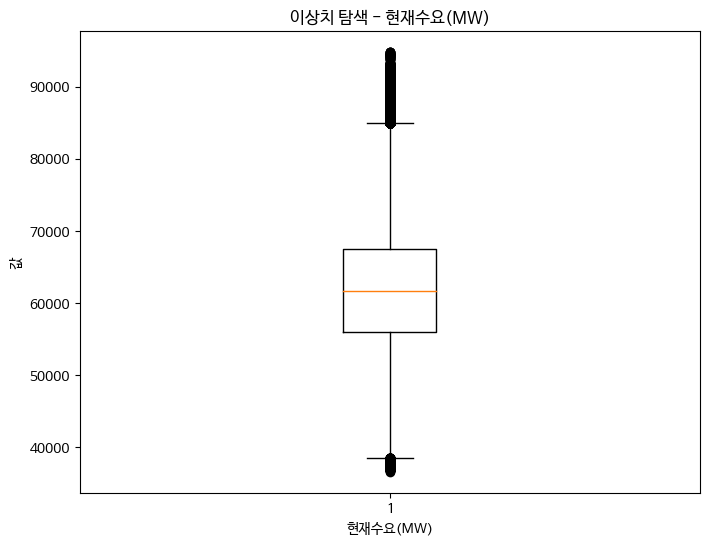

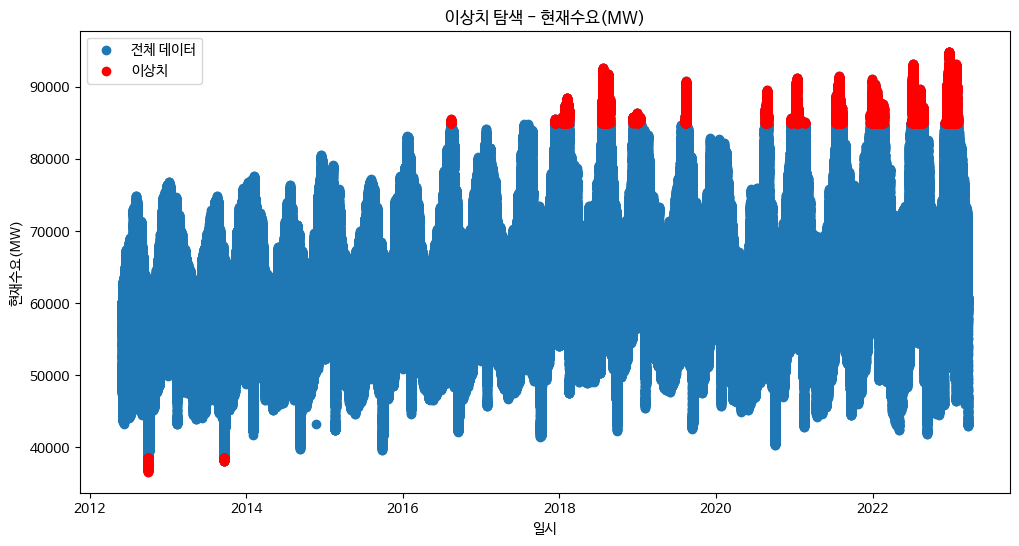

In [37]:
import matplotlib.pyplot as plt

# 한글폰트설정(로컬용)
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 한글폰트설정(코랩용)
plt.rc('font', family='NanumBarunGothic')

# 현재수요(MW) 칼럼의 이상치 탐색 함수
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers

# 현재수요(MW) 칼럼의 이상치 탐색
outliers = detect_outliers(ED, '현재수요(MW)')

# 이상치를 포함한 전체 데이터의 박스플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(ED['현재수요(MW)'])
plt.xlabel('현재수요(MW)')
plt.ylabel('값')
plt.title('이상치 탐색 - 현재수요(MW)')
plt.show()

# 이상치를 포함한 데이터의 산점도 그리기

# 산점도 그리기
plt.figure(figsize=(12, 6))
plt.scatter(ED.index, ED['현재수요(MW)'], label='전체 데이터')
plt.scatter(outliers.index, outliers['현재수요(MW)'], color='red', label='이상치')
plt.xlabel('일시')
plt.ylabel('현재수요(MW)')
plt.title('이상치 탐색 - 현재수요(MW)')
plt.legend()
plt.show()




* 산점도를 보니 2020년을 제외하면 2018년 이후로 전력수요량이 비슷한 경향을 띰.
* 2018년 이후로 이상치로 탐색된 지점은 그 이전 전력수요량 작았던 기간이 반영된 결과로 오히려 정상수치로 보임.
* 히트맵으로 알아보면

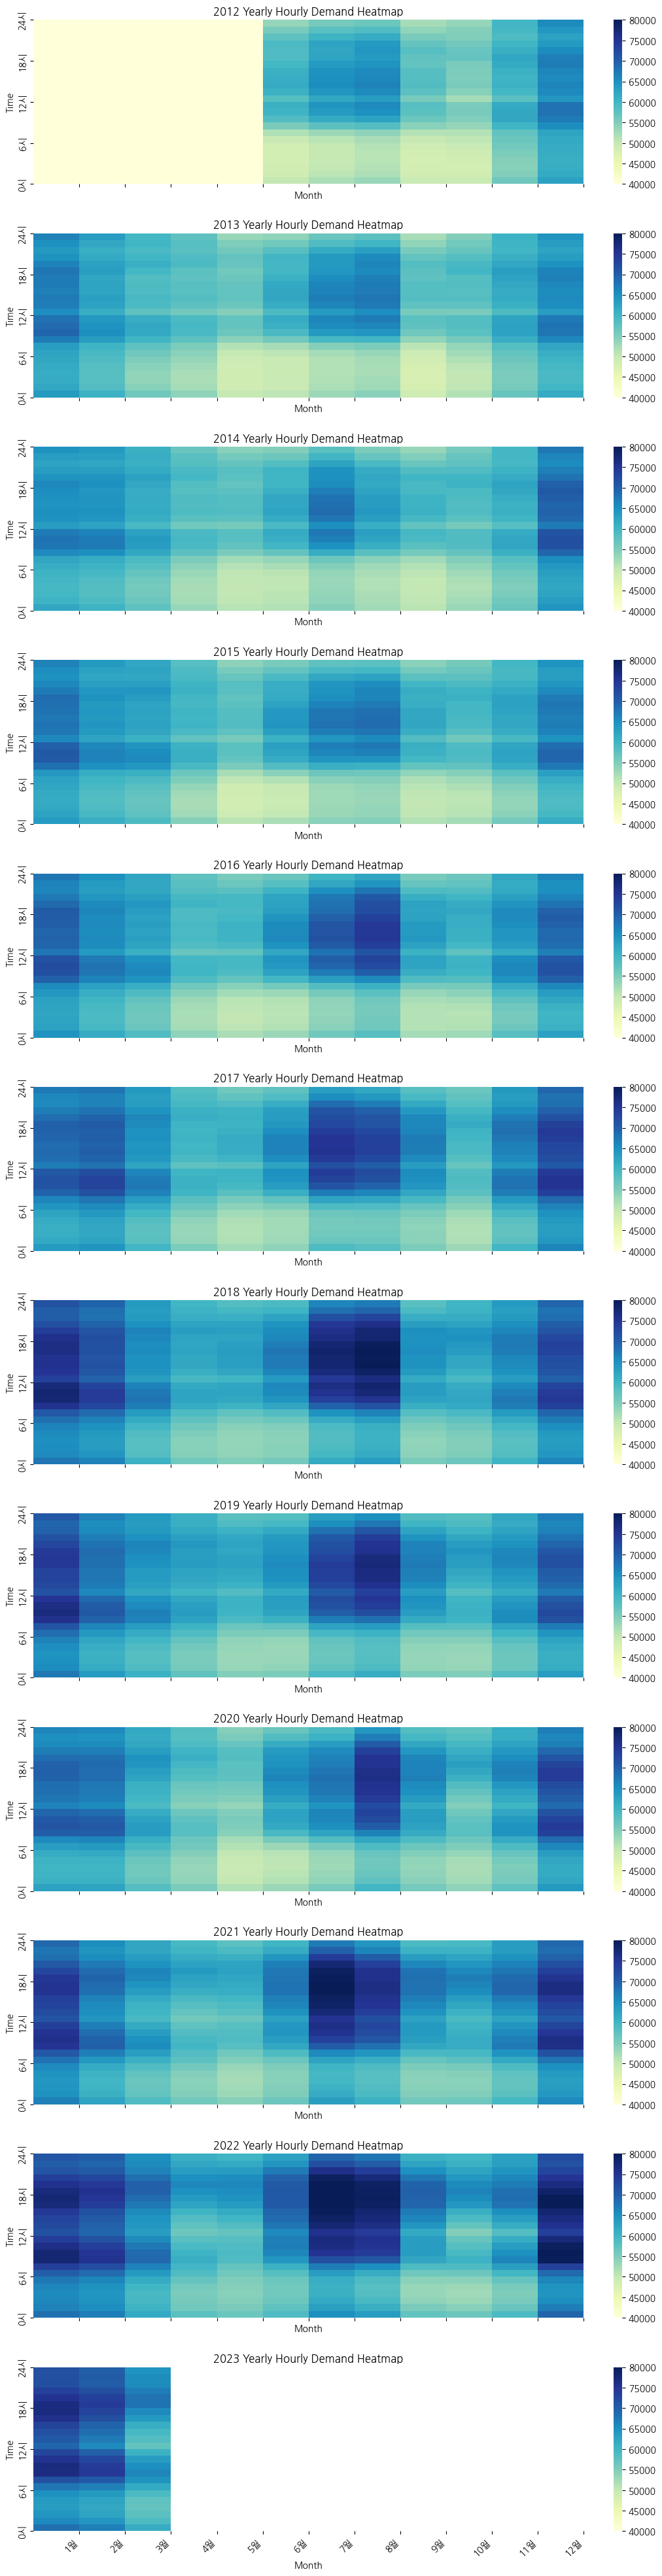

In [38]:
import seaborn as sns

# 한글폰트설정(코랩용)
plt.rc('font', family='NanumGothic')

# 히트맵의 2012년 데이터를 x축에 맞게 표현하기위해 임시로 없는 일시를 채우고 그 값을 0으로 한다.

# 잠시 ED파일을 변환
ED_du = ED.reset_index()
ED_du.columns = ['일시', '현재수요(MW)']

# 일시를 datetime 형식으로 변환
ED_du['일시'] = pd.to_datetime(ED_du['일시'])

# 5분 간격으로 datetime 범위 생성
start_date = pd.to_datetime('2012-01-01 00:00:00')
end_date = pd.to_datetime('2012-05-31 23:55:00')
new_dates = pd.date_range(start_date, end_date, freq='5min')

# 새로운 데이터프레임 생성
new_data = pd.DataFrame({
    '일시': new_dates,
    '현재수요(MW)': 0
})

# 기존 데이터프레임과 새로운 데이터프레임 병합
ED2 = pd.concat([new_data,ED_du])

# '년도', '월', '시간' 열 추가
ED2['년도'] = ED2['일시'].dt.year
ED2['월'] = ED2['일시'].dt.month
ED2['시간'] = ED2['일시'].dt.hour

# 년도별로 데이터프레임 분할
df_yearly = ED2.groupby('년도')

# 히트맵 그리기
fig, axes = plt.subplots(len(df_yearly), figsize=(12, 4*len(df_yearly)), sharex=True, sharey=True)

vmin = 40000  # 범례의 최소값
vmax = 80000  # 범례의 최대값

for i, (year, group) in enumerate(df_yearly):

    # 월별 시간별 전력수요 피벗 테이블 생성
    pivot_table = group.pivot_table(index='시간', columns='월', values='현재수요(MW)')

    # 히트맵 그리기
    sns.heatmap(pivot_table, cmap='YlGnBu', ax=axes[i], vmin=vmin, vmax=vmax, cbar_kws={'fraction': 0.046})
    axes[i].set_title(f'{year} Yearly Hourly Demand Heatmap')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Time')
    axes[i].invert_yaxis()  # Y축 뒤집기

    # 월 축 눈금 설정
    axes[i].set_xticks(range(1, 13, 1))
    axes[i].set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'], rotation=45, ha='right')

    # 시간 축에 눈금과 눈금 라벨 추가
    axes[i].set_yticks(range(0, 25, 6))
    axes[i].set_yticklabels(['0시', '6시', '12시', '18시', '24시'])

fig.subplots_adjust(hspace=0.3, bottom=0.1, top=0.9)  # 그래프의 상하 여백 및 상단과 하단 여백 조정
plt.show()



* 2018년부터 2023년 데이터와 유사해지기 시작.
* 2022년이 가장 비슷하고 2020년이 코로나 탓에 다른 경향을 보이는 것으로 추정.
* 2018년부터 데이터를 추출해 보기로 결정.

In [41]:
# 2018년부터 데이터 추출
ED_2018_2023 = ED[ED.index >= '2018-01-01 00:00:00']
ED_2018_2023

,현재수요(MW)
2018-01-01 00:00:00,60955.000
2018-01-01 00:05:00,60964.300
2018-01-01 00:10:00,60745.900
2018-01-01 00:15:00,60170.500
2018-01-01 00:20:00,60067.700
...,...
2023-03-19 23:35:00,58627.160
2023-03-19 23:40:00,57941.240
2023-03-19 23:45:00,57726.210
2023-03-19 23:50:00,57755.400


In [42]:
# 전력수요량 2018~2023 통계정보
ED_2018_2023.describe()

,현재수요(MW)
count,548352.000
mean,64286.388
std,8868.890
min,40299.300
25%,57661.500
50%,63548.500
75%,69870.450
max,94852.870


In [43]:
# ED_2018_2023.to_csv('5분단위_전력수요량(2018.01.01~2023.03.19)_일부보간.csv')

* 2018년부터 2023년 3월 19일 까지 전력수요량 데이터를 모음.
* 이 기간을 기준으로 변수데이터를 모을것.
* 마지막으로 예측해야할 2023-03-13~2023-03-19 전력수요량 데이터를 탐색해보고 흐름을 시각화하여 확인해보자.

In [45]:
target_df = filtered_df
target_df

,현재수요(MW)
2023-03-13 00:00:00,58782.030
2023-03-13 00:05:00,58954.440
2023-03-13 00:10:00,58710.580
2023-03-13 00:15:00,58298.440
2023-03-13 00:20:00,58263.700
...,...
2023-03-19 23:35:00,58627.160
2023-03-19 23:40:00,57941.240
2023-03-19 23:45:00,57726.210
2023-03-19 23:50:00,57755.400


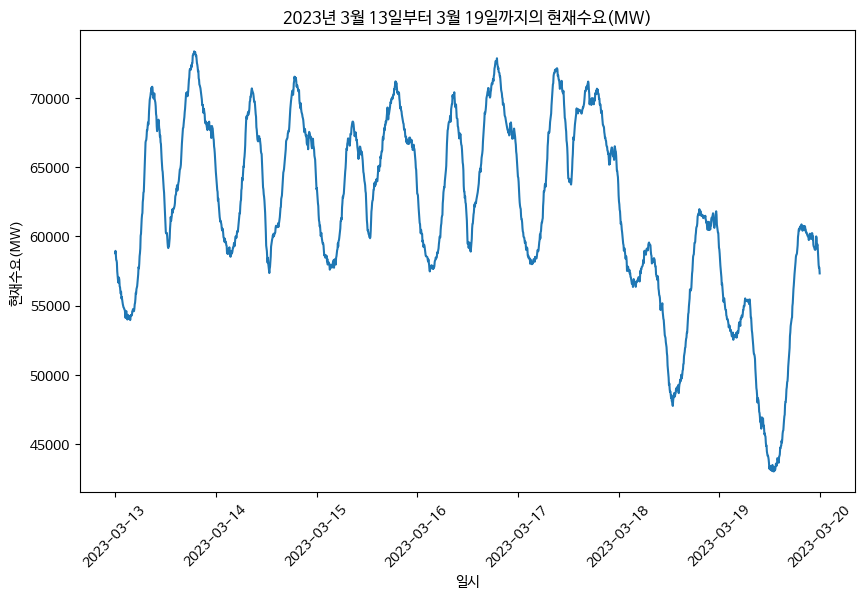

In [47]:
# 한글폰트설정(코랩용)
plt.rc('font', family='NanumBarunGothic')

# 필요한 기간의 데이터 추출
start_date = pd.to_datetime('2023-03-13')
end_date = pd.to_datetime('2023-03-19 23:55:00')
target_df = ED_2018_2023[(ED_2018_2023.index >= start_date) & (ED_2018_2023.index <= end_date)]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(target_df.index, target_df['현재수요(MW)'])
plt.xlabel('일시')
plt.ylabel('현재수요(MW)')
plt.title('2023년 3월 13일부터 3월 19일까지의 현재수요(MW)')
plt.xticks(rotation=45)
plt.show()

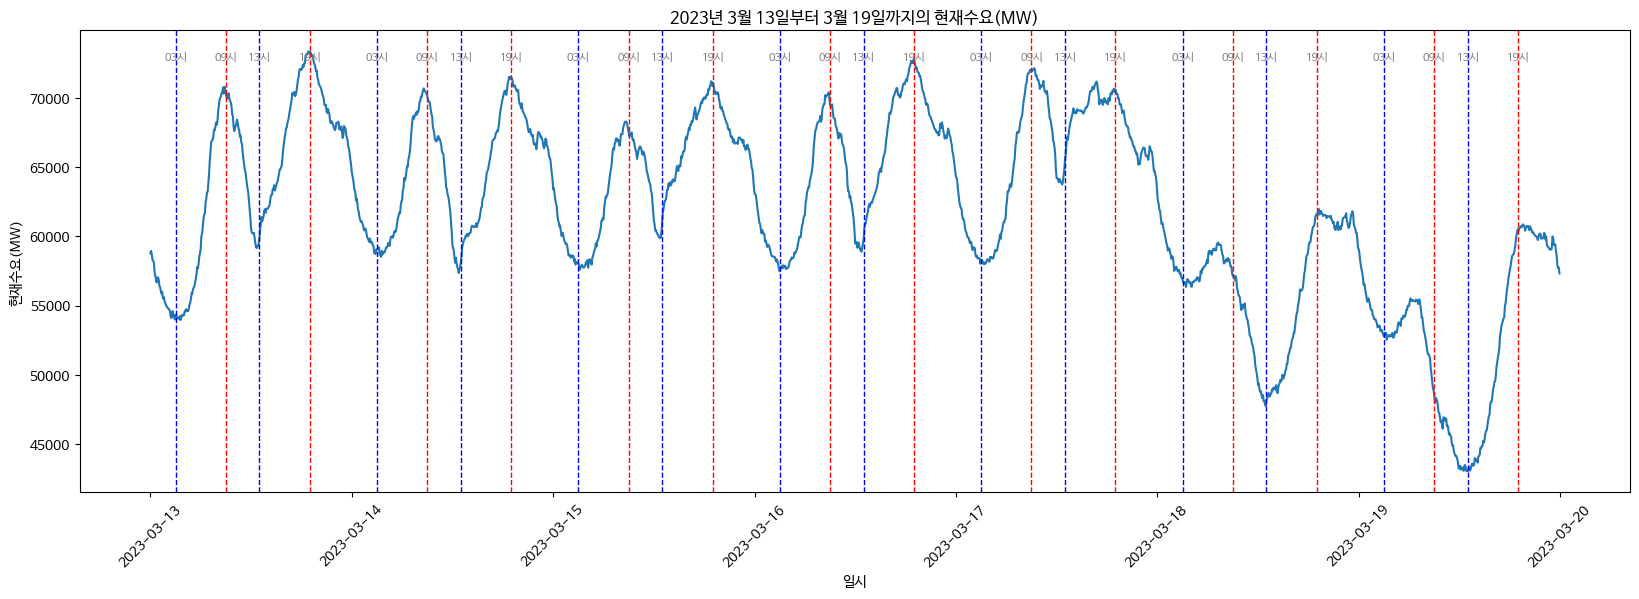

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정 (코랩용)
plt.rc('font', family='NanumBarunGothic')

# 필요한 기간의 데이터 추출
start_date = pd.to_datetime('2023-03-13')
end_date = pd.to_datetime('2023-03-19 23:55:00')
target_df = ED_2018_2023[(ED_2018_2023.index >= start_date) & (ED_2018_2023.index <= end_date)]

# 그래프 그리기
plt.figure(figsize=(20, 6))
plt.plot(target_df.index, target_df['현재수요(MW)'])
plt.xlabel('일시')
plt.ylabel('현재수요(MW)')
plt.title('2023년 3월 13일부터 3월 19일까지의 현재수요(MW)')
plt.xticks(rotation=45)

# 일별 시간대 눈금 및 수직 선 추가
days = pd.date_range(start=start_date, end=end_date, freq='D')
for day in days:
    day_str = day.strftime('%Y-%m-%d')
    for hour in [3, 9, 13, 19]:
        time = pd.to_datetime(day_str) + pd.DateOffset(hours=hour)
        if time >= start_date and time <= end_date:
            if hour in [3, 13]:
                plt.axvline(x=time, color='blue', linestyle='--', linewidth=1)
            elif hour in [9, 19]:
                plt.axvline(x=time, color='red', linestyle='--', linewidth=1)
            else:
                plt.axvline(x=time, color='gray', linestyle='--', linewidth=1)
            plt.text(time, target_df['현재수요(MW)'].max(), f'{hour:02d}시', ha='center', va='top', color='gray', fontsize=8)

plt.show()


* 예측해야할 데이터의 시기(23-3-13 ~ 23-3-19)는 봄날에 해당됨.

* 요일별로 보면 13일 부터 17일은 평일이며 18, 19일은 휴일.  
  평일날 보다 휴일날 전력수요량이 적다.
 * 휴일에 기업들이 보통 쉬기 때문에 큰 낙폭을 보이는 것으로 보임.
 * 참고로 전력은 주택용보다 산업용등 주로 일할 때 훨씬 많이 사용됨.


* 하루 시간대별로 보면 전체적으로 3시, 13시 쯤이 하락 폭이 가장 크고 9시, 19시 쯤이 상승폭이 크다.
 * 새벽 3시쯤은 보통 자는 시간이고 13시쯤은 점심시간이라 전력 사용량이 줄어드는 것으로 보임.
 * 9시는 아침먹는 때와 한창 일을 시작하는 때로 추측할 수 있고 19시쯤은 저녁먹는 때, 일을 마무리하는 시간대로 볼 수 있음.  
 그리고 저녁이다보니 조명을 사용하는 시간때로 추측할 수 있어 전력사용이 최대치를 찍었을 것.
* 전력수요량 데이터 EDA 끝.  

In [57]:
## 계약종별 전력사용량: https://bigdata.kepco.co.kr/cmsmain.do?scode=S01&pcode=000166#

## 2. 기상데이터 EDA

### 1) 기상데이터 불러오기

* 기상자료개방포털에서 시간별 기상데이터가 1년단위로 추출할 수 있음.
* 1분단위 데이터가 있었으나 1년단위 데이터에 훨씬 더 많은 기상변수들이 있어서 이 자료를 선택.
* 추후에 1분단위 데이터도 불러와 비교해 볼 수 있음.  
* 2018년부터 2023년3월 12일까지 1년단위로 불러와 결합.

In [66]:
# 1년 단위로 추출한 기상데이터 불러오기
weather_18 = pd.read_csv("2018기상정보.csv",encoding='cp949')
weather_19 = pd.read_csv("2019기상정보.csv",encoding='cp949')
weather_20 = pd.read_csv("2020기상정보.csv",encoding='cp949')
weather_21 = pd.read_csv("2021기상정보.csv",encoding='cp949')
weather_22 = pd.read_csv("2022기상정보.csv",encoding='cp949')
weather_23 = pd.read_csv("2023기상정보.csv",encoding='cp949')

# 전체 병합
weather = pd.concat([weather_18,weather_19,weather_20,weather_21,weather_22,weather_23])
weather

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,현지기압(hPa),현지기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),전운량(10분위),지면온도(°C),지면온도 QC플래그
0,90,속초,2018-01-01 00:00,-1.000,0.000,NaN,NaN,1.100,NaN,250.000,...,1019.400,0.000,NaN,9.000,NaN,9.000,NaN,NaN,-2.300,0.000
1,90,속초,2018-01-01 01:00,-2.100,0.000,NaN,NaN,1.700,0.000,230.000,...,1019.700,0.000,NaN,9.000,NaN,9.000,NaN,NaN,-2.700,0.000
2,90,속초,2018-01-01 02:00,-2.100,0.000,NaN,NaN,1.400,0.000,160.000,...,1020.100,0.000,NaN,9.000,NaN,9.000,NaN,NaN,-3.000,0.000
3,90,속초,2018-01-01 03:00,-2.200,0.000,NaN,NaN,0.900,0.000,230.000,...,1020.400,0.000,NaN,9.000,NaN,9.000,NaN,NaN,-3.200,0.000
4,90,속초,2018-01-01 04:00,-2.000,0.000,NaN,NaN,1.200,0.000,250.000,...,1020.400,0.000,NaN,9.000,NaN,9.000,NaN,NaN,-3.300,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177930,295,남해,2023-03-19 20:00,10.000,NaN,NaN,NaN,0.700,NaN,270.000,...,1012.900,NaN,NaN,9.000,NaN,9.000,NaN,1.000,6.300,NaN
177931,295,남해,2023-03-19 21:00,8.700,NaN,NaN,NaN,1.100,NaN,270.000,...,1013.300,NaN,NaN,9.000,NaN,9.000,NaN,5.000,5.300,NaN
177932,295,남해,2023-03-19 22:00,8.200,NaN,NaN,NaN,0.900,NaN,230.000,...,1013.400,NaN,NaN,9.000,NaN,9.000,NaN,5.000,4.600,NaN
177933,295,남해,2023-03-19 23:00,8.300,NaN,NaN,NaN,0.700,NaN,250.000,...,1013.300,NaN,NaN,9.000,NaN,9.000,NaN,7.000,4.400,NaN


* 지점과 지점명이 있는데 전력자료가 전국단위이기 때문에 지역별로 기상정보를 나눌 필요는 없다.
* 일시기준으로 기상자료를 통합, 평균 내어 데이터를 정리할 것.
* 그 전에 데이터 탐색을 시작.

### 2) 기상데이터 탐색

* 변수 설명
  - 기온: 섭씨단위로 표현된 대기의 온도.지면으로부터 1.5m 높이에서 사람기준으로 측정.   
  - 강수량: 강수는 구름이나 공기 중으로부터 지면에 떨어진 액체 또는 고체의 수증기 응결체로서, 비, 이슬비, 얼음싸라기, 눈, 우박, 눈보라             등을 포함. 눈과 같은 고체성 강수는 융해시킨 물의 깊이로 측정하여 강수에 포함.
  - 풍속: 바람의 속도. 시간당 풍속은 해당 시각의 10분전 부터 정시까지의 10개의 1분 평균 풍향・풍속의 평균값으로 산출. 13:00 산출값은             12:51~13:00까지의 평균값..
  - 풍향(16방위): 풍향을 N, NNE, NE, ENE(영문표기)등의 16방위로 측정. 0~360(북은 0도또는 360)로 환산할 수 있으며, 시계 방향으로 동은 90도, 서는 270도가 됨.
  - 습도: 수증기 함유량에 관한 대기의 상태. 기상청은 상대습도를 기준으로 습도를 측정·수집함.
  - 현지기압: 대기의 무게로 인한 압력.
  - 일사: 단위면적이 단위시간에 받는 일사에너지 양.
  - 일조: 일사가 구름이나 안개 등에 차단되지 않고 경계값 이상 지표면에 도달한 시간.
  - 적설: 관측노장에 쌓여 있는 눈의 높이.
  - 전운량(10분위): 구름의 양. 0은 맑은 하늘을 의미하고 10은 구름이 많이 낀 하늘을 의미.
  - 지면온도: 말그대로 지면온도로 온도계 주위 30cm의 잔디를 제거해 맨땅이 노출되게 하고, 직사광선에 의한 오차를 줄이기 위해 감지부의                 금속부분을 흙으로 얇게 덮어 측정.
  - QC플래그: 시간 자료에 대해 관측값의 정상 여부를 판단하는 품질검사 자료.

In [67]:
# 데이터 크기
weather.shape

(4342601, 23)

In [68]:
# 데이터 정보
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4342601 entries, 0 to 177934
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   지점          int64  
 1   지점명         object 
 2   일시          object 
 3   기온(°C)      float64
 4   기온 QC플래그    float64
 5   강수량(mm)     float64
 6   강수량 QC플래그   float64
 7   풍속(m/s)     float64
 8   풍속 QC플래그    float64
 9   풍향(16방위)    float64
 10  풍향 QC플래그    float64
 11  습도(%)       float64
 12  습도 QC플래그    float64
 13  현지기압(hPa)   float64
 14  현지기압 QC플래그  float64
 15  일조(hr)      float64
 16  일조 QC플래그    float64
 17  일사(MJ/m2)   float64
 18  일사 QC플래그    float64
 19  적설(cm)      float64
 20  전운량(10분위)   float64
 21  지면온도(°C)    float64
 22  지면온도 QC플래그  float64
dtypes: float64(20), int64(1), object(2)
memory usage: 795.2+ MB


In [69]:
# 데이터 결측치
weather.isnull().sum()

지점                  0
지점명                 0
일시                  0
기온(°C)           3357
기온 QC플래그      3615080
강수량(mm)       3948128
강수량 QC플래그     3546820
풍속(m/s)          7917
풍속 QC플래그      3651266
풍향(16방위)         8332
풍향 QC플래그      3650925
습도(%)            4858
습도 QC플래그      3616976
현지기압(hPa)        3671
현지기압 QC플래그    3617872
일조(hr)        1981675
일조 QC플래그      1999740
일사(MJ/m2)     3227918
일사 QC플래그       955824
적설(cm)        4245934
전운량(10분위)      478082
지면온도(°C)         6724
지면온도 QC플래그    3595876
dtype: int64

* 결측치가 많다.


### 3) 기상데이터 전처리

* 일단 QC플래그부터 보자.
* QC플래그는 시간 자료에 대해 관측값의 정상 여부를 판단하는 품질검사 자료임.
* 플래그 종류(의미): 0(정상), 1(오류), 9(결측)
* 위 데이터를 확인해보니 QC플래그는 의미를 알 수 없는 공란이 많아 보임.
* 확인해보면

In [70]:
# QC플래그 칼럼값 추출
contains_qc = weather.columns.str.contains('QC')
qc_columns = weather.columns[contains_qc].tolist()
weather[qc_columns]

,기온 QC플래그,강수량 QC플래그,풍속 QC플래그,풍향 QC플래그,습도 QC플래그,현지기압 QC플래그,일조 QC플래그,일사 QC플래그,지면온도 QC플래그
0,0.000,NaN,NaN,NaN,0.000,0.000,9.000,9.000,0.000
1,0.000,NaN,0.000,0.000,0.000,0.000,9.000,9.000,0.000
2,0.000,NaN,0.000,0.000,0.000,0.000,9.000,9.000,0.000
3,0.000,NaN,0.000,0.000,0.000,0.000,9.000,9.000,0.000
4,0.000,NaN,0.000,0.000,0.000,0.000,9.000,9.000,0.000
...,...,...,...,...,...,...,...,...,...
177930,NaN,NaN,NaN,NaN,NaN,NaN,9.000,9.000,NaN
177931,NaN,NaN,NaN,NaN,NaN,NaN,9.000,9.000,NaN
177932,NaN,NaN,NaN,NaN,NaN,NaN,9.000,9.000,NaN
177933,NaN,NaN,NaN,NaN,NaN,NaN,9.000,9.000,NaN


In [71]:
# QC플래그 값 빈도수 확인

result_df = pd.DataFrame()
for column in qc_columns:
    counts = weather[column].value_counts(dropna=False).to_frame().reset_index() # NaN 값과 0.0 값을 구분하기 위함
    counts.columns = [column, 'Counts']
    result_df = pd.concat([result_df, counts], axis=1)

pd.DataFrame(result_df)

,기온 QC플래그,Counts,강수량 QC플래그,Counts,풍속 QC플래그,Counts,풍향 QC플래그,Counts,습도 QC플래그,Counts,현지기압 QC플래그,Counts,일조 QC플래그,Counts,일사 QC플래그,Counts,지면온도 QC플래그,Counts
0,NaN,3615080,NaN,3546820.000,NaN,3651266.000,NaN,3650925.000,NaN,3616976.000,NaN,3617872,NaN,1999740,9.000,3223813,NaN,3595876
1,0.000,723895,9.000,736142.000,0.000,687349.000,0.000,687274.000,0.000,720508.000,0.000,720789,9.000,1977581,NaN,955824,0.000,739749
2,9.000,3349,0.000,59639.000,9.000,3986.000,9.000,4402.000,9.000,5117.000,9.000,3601,0.000,365109,0.000,162813,9.000,6918
3,1.000,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,339,1.000,171,1.000,151,1.000,58


* 의미를 알 수 없는 NaN 값이 많다.
* 일조와 일사값의 경우 결측값도 많다.  
* 하지만 모델 정확도를 위해 의미를 알 수 있는 값만 추출해서 활용할 수 있음.
* 이상치로 분류된 값들의 품질판단도 가능
* 필요할시 활용하고 전처리 단계에서는 데이터 상태 파악만 하고 일단 제거

In [72]:
# QC플래그 제거 자료
weather_dqc = weather.drop(qc_columns, axis=1)
weather_dqc

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
0,90,속초,2018-01-01 00:00,-1.000,NaN,1.100,250.000,23.000,1019.400,NaN,NaN,NaN,NaN,-2.300
1,90,속초,2018-01-01 01:00,-2.100,NaN,1.700,230.000,28.000,1019.700,NaN,NaN,NaN,NaN,-2.700
2,90,속초,2018-01-01 02:00,-2.100,NaN,1.400,160.000,29.000,1020.100,NaN,NaN,NaN,NaN,-3.000
3,90,속초,2018-01-01 03:00,-2.200,NaN,0.900,230.000,28.000,1020.400,NaN,NaN,NaN,NaN,-3.200
4,90,속초,2018-01-01 04:00,-2.000,NaN,1.200,250.000,27.000,1020.400,NaN,NaN,NaN,NaN,-3.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177930,295,남해,2023-03-19 20:00,10.000,NaN,0.700,270.000,49.000,1012.900,NaN,NaN,NaN,1.000,6.300
177931,295,남해,2023-03-19 21:00,8.700,NaN,1.100,270.000,54.000,1013.300,NaN,NaN,NaN,5.000,5.300
177932,295,남해,2023-03-19 22:00,8.200,NaN,0.900,230.000,54.000,1013.400,NaN,NaN,NaN,5.000,4.600
177933,295,남해,2023-03-19 23:00,8.300,NaN,0.700,250.000,58.000,1013.300,NaN,NaN,NaN,7.000,4.400


* 다시 결측치 확인

In [73]:
# 데이터 결측치
weather_dqc.isnull().sum()

지점                 0
지점명                0
일시                 0
기온(°C)          3357
강수량(mm)      3948128
풍속(m/s)         7917
풍향(16방위)        8332
습도(%)           4858
현지기압(hPa)       3671
일조(hr)       1981675
일사(MJ/m2)    3227918
적설(cm)       4245934
전운량(10분위)     478082
지면온도(°C)        6724
dtype: int64

* 나머지 결측치를 처리해야 함.
* 연속성여부를 기준으로 결측처리를 달리하려 함.
 * 연속적인 특징을 가진 '기온', '풍속', '습도','현지기압', '지면온도'는 선형보간을 할 것.
 * 불연속적인 특징을 지닌 '강수량', '일조', '일사', '적설', '전운량'은 다르게 처리.
   * 기상청 홈페이지 결측관련 최신 답변을 참고하면 강수량, 적설의 경우 결측값은 내리지 않은 날이고 0은 아주 미미하게 내린날.
   * 일사, 일조의 경우 06~20시 값 중 비어 있으면 결측. 일사, 일조량과 관계가 깊은 전운량을 고려해 결측값 대체. 그 외 시간대 결측은 전부 0으로 처리할 것.
* 풍향은 1시간 단위 데이터에는 16방위로 나타나있음. 다른 기상철 1분단위 데이터에는 좀 더 정밀하게 나타나 있음. 필요하면 그 데이터에서 추출하여 사용하고 여기에서는 제거

많은 전운량은 칼럼을 제거.

In [ ]:
# 기상청 홈페이지 답변: https://data.kma.go.kr/community/board/detailBoard.do

In [98]:
weather_dqc.columns

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '현지기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '지면온도(°C)'],
      dtype='object')

In [99]:
# 기온 결측값 행
temp_nan_row = weather_dqc[weather_dqc['풍향(16방위)'].isna()]
temp_nan_row

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
29555,98,동두천,2018-05-17 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29556,98,동두천,2018-05-17 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29557,98,동두천,2018-05-17 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29607,98,동두천,2018-05-19 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29608,98,동두천,2018-05-19 16:00,25.300,NaN,NaN,NaN,24.000,1002.000,NaN,NaN,NaN,NaN,35.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167311,284,거창,2023-01-26 14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000,NaN
167312,284,거창,2023-01-26 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000,NaN
167313,284,거창,2023-01-26 16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000,NaN
167314,284,거창,2023-01-26 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000,NaN


In [95]:
temp_nan_row['지점명'].unique()

array(['속초', '동두천', '파주', '강릉', '서울', '충주', '서산', '울진', '통영', '완도', '고창',
       '순천', '진도(첨찰산)', '고산', '성산', '서귀포', '진주', '강화', '이천', '인제', '홍천',
       '태백', '제천', '보령', '부여', '부안', '남원', '장수', '고창군', '영광군', '김해시',
       '순창군', '보성군', '강진군', '장흥', '해남', '의령군', '광양시', '영주', '문경', '영덕',
       '거창', '합천', '산청', '거제', '춘천', '추풍령', '군산', '목포', '여수', '흑산도', '제주',
       '양평', '보은', '천안', '북창원', '진도군', '봉화', '남해', '북춘천', '철원', '대관령',
       '백령도', '북강릉', '동해', '인천', '원주', '울릉도', '수원', '영월', '청주', '대전',
       '안동', '상주', '포항', '대구', '전주', '울산', '창원', '광주', '부산', '정선군', '금산',
       '세종', '임실', '정읍', '양산시', '고흥', '함양군', '청송군', '의성', '구미', '영천',
       '경주시', '밀양'], dtype=object)

In [96]:
weather['지점명'].unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '진도(첨찰산)', '홍성',
       '제주', '고산', '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백',
       '정선군', '제천', '보은', '천안', '보령', '부여', '금산', '부안', '임실', '정읍', '남원',
       '장수', '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '장흥',
       '해남', '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주', '문경', '청송군',
       '영덕', '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해',
       '세종'], dtype=object)

* 데이터가 지점별 관측자료로 되어있다.
* 전력자료가 전국단위이기 때문에 일시기준으로 기상자료를 통합, 평균 내어 데이터를 정리한다.
* 나중에 지점별로도 전처리해 모델링 가능.

In [ ]:
# 일시를 datetime으로 변환
weather_dqc['일시'] = pd.to_datetime(weather_dqc['일시'])

# 필요없는 칼럼 제거
weather_dqc = weather_dqc.drop(['지점','지점명'], axis=1)

# 일시 기준으로 평균계산
weather_mean = weather_dqc.groupby('일시').mean()
weather_mean

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-01 00:00:00,-1.299,NaN,1.596,176.316,55.042,1011.751,NaN,NaN,1.650,2.136,-1.706
2018-01-01 01:00:00,-1.639,NaN,1.692,206.526,56.305,1011.716,NaN,NaN,1.650,NaN,-1.906
2018-01-01 02:00:00,-2.004,NaN,1.599,188.105,57.958,1011.877,NaN,NaN,1.650,NaN,-2.158
2018-01-01 03:00:00,-2.328,0.000,1.660,185.368,59.295,1012.275,NaN,NaN,1.650,1.500,-2.467
2018-01-01 04:00:00,-2.716,NaN,1.693,181.789,60.516,1012.354,NaN,NaN,1.650,1.364,-2.761
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 20:00:00,9.152,NaN,1.198,170.947,52.632,1005.962,NaN,NaN,NaN,2.358,7.335
2023-03-19 21:00:00,7.706,NaN,1.072,152.737,58.295,1006.193,NaN,NaN,NaN,2.295,6.032
2023-03-19 22:00:00,6.527,NaN,0.895,120.737,62.095,1006.311,NaN,NaN,NaN,2.347,4.961


* 그리고 프로젝트 유의사항에 맞게 일시를 5분단위로 변환해야 함.
* 데이터가 연속적인 특징이 있으므로 5분단위 보간법(interpolation)사용
* 선형 보간을 사용해 누락 데이터가 상승구간에서는 상승하는 추세로,
  하강하는 구간에서는 하강하는 추세로 보간됨.

In [ ]:
# 5분 단위로 보간(interpolation)
weather_interpolated = weather_mean.resample('5T').interpolate()
weather_interpolated

# # 데이터프레임에서 '일시' 열을 datetime 형식으로 변환
# ED['일시'] = pd.to_datetime(ED['일시'])

# # '일시' 열을 인덱스로 설정
# ED = ED.set_index('일시')

# # 5분 단위로 모든 값을 포함하는 새로운 인덱스 생성
# new_index = pd.date_range(start=ED.index.min(), end=ED.index.max(), freq='5min')

# # 보간을 수행하여 새로운 데이터프레임 생성
# ED = ED.reindex(new_index).interpolate(method='linear')
# ED

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-01 00:00:00,-1.299,NaN,1.596,176.316,55.042,1011.751,NaN,NaN,1.650,2.136,-1.706
2018-01-01 00:05:00,-1.327,NaN,1.604,178.833,55.147,1011.748,NaN,NaN,1.650,2.119,-1.723
2018-01-01 00:10:00,-1.356,NaN,1.612,181.351,55.253,1011.745,NaN,NaN,1.650,2.101,-1.740
2018-01-01 00:15:00,-1.384,NaN,1.620,183.868,55.358,1011.742,NaN,NaN,1.650,2.083,-1.756
2018-01-01 00:20:00,-1.412,NaN,1.628,186.386,55.463,1011.739,NaN,NaN,1.650,2.066,-1.773
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:40:00,4.871,0.000,0.864,124.456,68.477,1006.188,0.086,0.061,0.000,2.646,3.723
2023-03-19 23:45:00,4.794,0.000,0.866,124.079,68.750,1006.172,0.086,0.061,0.000,2.679,3.671
2023-03-19 23:50:00,4.718,0.000,0.868,123.702,69.023,1006.157,0.086,0.061,0.000,2.712,3.618


* 필요한 데이터를 추출 및 변환하였다.
* 데이터 탐색 시작

### 3) 기상데이터 탐색

In [ ]:
# 기상데이터 크기
weather_mean.shape

(45697, 11)

In [ ]:
# 기상데이터 정보
weather_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45697 entries, 2018-01-01 00:00:00 to 2023-03-20 00:00:00
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기온(°C)     45697 non-null  float64
 1   강수량(mm)    20102 non-null  float64
 2   풍속(m/s)    45697 non-null  float64
 3   풍향(16방위)   45697 non-null  float64
 4   습도(%)      45697 non-null  float64
 5   현지기압(hPa)  45697 non-null  float64
 6   일조(hr)     25801 non-null  float64
 7   일사(MJ/m2)  26217 non-null  float64
 8   적설(cm)     9865 non-null   float64
 9   전운량(10분위)  45212 non-null  float64
 10  지면온도(°C)   45697 non-null  float64
dtypes: float64(11)
memory usage: 5.2 MB


In [ ]:
# 결측값 확인
weather_mean.isnull().sum()

기온(°C)           0
강수량(mm)      25595
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
현지기압(hPa)        0
일조(hr)       19896
일사(MJ/m2)    19480
적설(cm)       35832
전운량(10분위)      485
지면온도(°C)         0
dtype: int64

* 강수량, 일조, 일사열, 적설, 전운량에 결측값이 있다.
* 기상청 홈페이지 답변(https://data.kma.go.kr/community/board/detailBoard.do) 을 참고하면 강수량의 경우 결측값은 내리지 않은 날이고 0은 아주 미미하게 내린날이다. 일사, 일조 관측 시간(일출~일몰) 동안 결측인 경우 값이 0이 아니라 없는 것
전운량은 전체적인 흐름을 파악하고 급변하지 않는다는 증거가 발견될시 선형보간
* 일시를 살펴보면

In [ ]:
# 강수량 결측값 행
rain_nan_rows = weather_mean[weather_mean['전운량(10분위)'].isna()]
rain_nan_rows

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-01 01:00:00,-1.639,NaN,1.692,206.526,56.305,1011.716,NaN,NaN,1.650,NaN,-1.906
2018-01-01 02:00:00,-2.004,NaN,1.599,188.105,57.958,1011.877,NaN,NaN,1.650,NaN,-2.158
2018-01-01 19:00:00,0.671,NaN,1.582,208.316,47.758,1014.075,NaN,NaN,1.250,NaN,-0.622
2018-01-01 20:00:00,-0.171,NaN,1.449,164.737,52.989,1014.358,NaN,NaN,1.150,NaN,-1.021
2018-01-01 22:00:00,-1.641,NaN,1.219,137.263,61.137,1014.903,NaN,NaN,1.150,NaN,-1.899
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31 02:00:00,25.022,NaN,1.231,145.368,83.526,993.688,NaN,NaN,NaN,NaN,25.417
2018-07-31 19:00:00,30.989,NaN,1.837,172.211,61.095,990.893,0.717,0.368,NaN,NaN,34.067
2018-07-31 20:00:00,29.013,NaN,1.487,158.316,69.547,991.141,0.088,0.030,NaN,NaN,31.003


In [ ]:
# 강수량 결측값 행
rain_nan_rows = weather_interpolated[weather_interpolated['강수량(mm)'].isna()]

# 일조 결측값 행
sun_nan_rows = weather_interpolated[weather_interpolated['일조(hr)'].isna()]

# 일사 결측값 행
solar_nan_rows = weather_interpolated[weather_interpolated['일사(MJ/m2)'].isna()]

min_date = rain_nan_rows.index.min().strftime('%Y-%m-%d')
max_date = rain_nan_rows.index.max().strftime('%Y-%m-%d')

# 강수량 결측 년월일 범위 출력
print("강수량 결측값데이터의 년월일 범위:", min_date, "~", max_date)

min_date = sun_nan_rows.index.min().strftime('%Y-%m-%d')
max_date = sun_nan_rows.index.max().strftime('%Y-%m-%d')

# 일조 결측 년월일 범위 출력
print("일조 결측값데이터의 년월일 범위:", min_date, "~", max_date)

min_date = solar_nan_rows.index.min().strftime('%Y-%m-%d')
max_date = solar_nan_rows.index.max().strftime('%Y-%m-%d')

# 일사 결측 년월일 범위 출력
print("일사 결측값데이터의 년월일 범위:", min_date, "~", max_date)

강수량 결측값데이터의 년월일 범위: 2018-01-01 ~ 2018-01-01
일조 결측값데이터의 년월일 범위: 2018-01-01 ~ 2018-01-01
일사 결측값데이터의 년월일 범위: 2018-01-01 ~ 2018-01-01


* 결측값들이 전부 2018-01-01 하루의 데이터에 몰려있다.
* 다른 일자에 데이터가 많고 연속형 데이터이기 때문에 결측값을 특정값으로 대체하는것 보다   
  2018-01-01 데이터를 삭제하는 것이 낫다고 판단.
* 2018-01-01 데이터 삭제

In [ ]:
# 2018-01-01 데이터 삭제
weather_interpolated = weather_interpolated.drop(
                       weather_interpolated[weather_interpolated.index.strftime('%Y-%m-%d') == '2018-01-01'].index)
weather_interpolated

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-02 00:00:00,-2.531,0.000,1.233,124.105,65.537,1015.181,0.022,0.025,1.150,0.364,-2.619
2018-01-02 00:05:00,-2.563,0.000,1.215,124.360,65.683,1015.179,0.021,0.025,1.229,0.361,-2.649
2018-01-02 00:10:00,-2.595,0.000,1.198,124.614,65.830,1015.177,0.021,0.025,1.308,0.359,-2.680
2018-01-02 00:15:00,-2.627,0.000,1.180,124.868,65.976,1015.176,0.021,0.025,1.388,0.356,-2.710
2018-01-02 00:20:00,-2.659,0.000,1.163,125.123,66.123,1015.174,0.021,0.025,1.467,0.354,-2.741
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:40:00,4.871,0.000,0.864,124.456,68.477,1006.188,0.086,0.061,0.000,2.646,3.723
2023-03-19 23:45:00,4.794,0.000,0.866,124.079,68.750,1006.172,0.086,0.061,0.000,2.679,3.671
2023-03-19 23:50:00,4.718,0.000,0.868,123.702,69.023,1006.157,0.086,0.061,0.000,2.712,3.618


In [ ]:
# 기상데이터 통계량
weather_interpolated.describe()

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
count,548065.000,548065.000,548065.000,548065.000,548065.000,548065.000,548065.000,548065.000,548065.000,548065.000,548065.000
mean,12.897,0.589,1.951,171.148,68.994,1004.350,0.273,0.600,3.458,5.253,14.925
std,9.959,1.300,0.962,53.379,17.778,7.771,0.349,0.835,6.531,3.002,12.053
min,-15.128,0.000,0.463,54.842,18.979,970.706,0.000,0.000,0.000,0.000,-9.335
25%,4.814,0.000,1.185,127.237,56.153,998.311,0.004,0.013,0.369,2.645,4.504
50%,13.296,0.114,1.748,161.421,71.221,1004.809,0.053,0.059,0.729,5.379,14.603
75%,21.465,0.578,2.480,210.456,84.189,1010.294,0.559,1.069,2.700,7.898,24.027
max,35.212,74.600,7.088,304.574,97.968,1025.017,1.000,3.590,83.000,10.000,58.634


### 4) 기상데이터 시각화

* 데이터 시각화를 통해 데이터 분포, 이상치 탐색, 상관관계를 알아볼 것.

<ipython-input-48-054368d978a6>:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


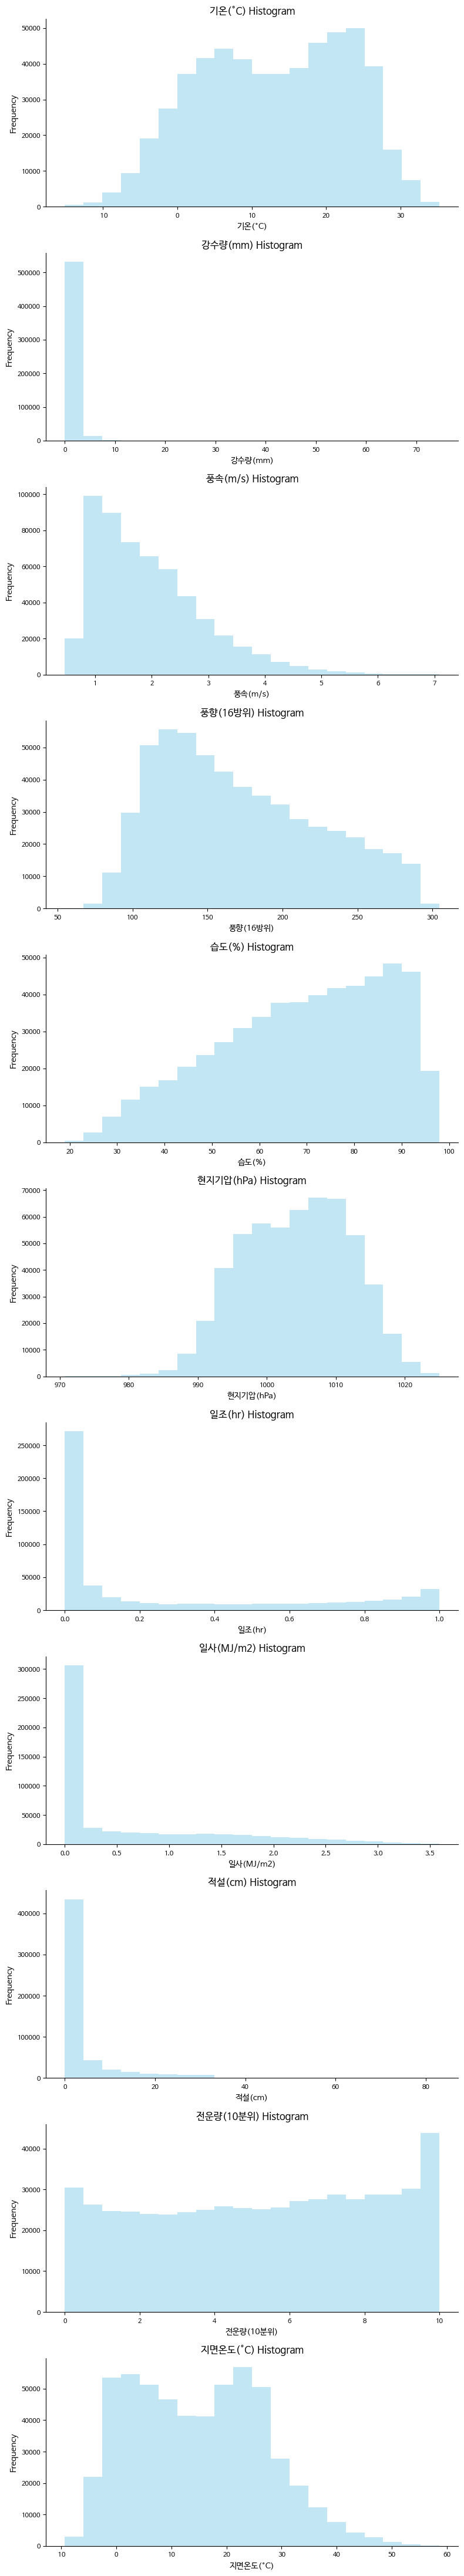

In [ ]:
import matplotlib.pyplot as plt

# 기상데이터 변수들 분포

# 한글폰트설정(코랩용)
plt.rc('font', family='NanumBarunGothic')

# 변수들 선택
variables = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '현지기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '지면온도(°C)']

# 그래프 설정
fig, axes = plt.subplots(len(variables), figsize=(8, 4*len(variables)))

# 변수별 히스토그램 그리기
for i, variable in enumerate(variables):
    axes[i].hist(weather_interpolated[variable].dropna(), bins=20, alpha=0.5, color='skyblue')
    axes[i].set_title(f'{variable} Histogram', fontsize=12)
    axes[i].set_xlabel(variable, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].tick_params(axis='both', which='both', labelsize=8)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



<ipython-input-49-c8ae006d2904>:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


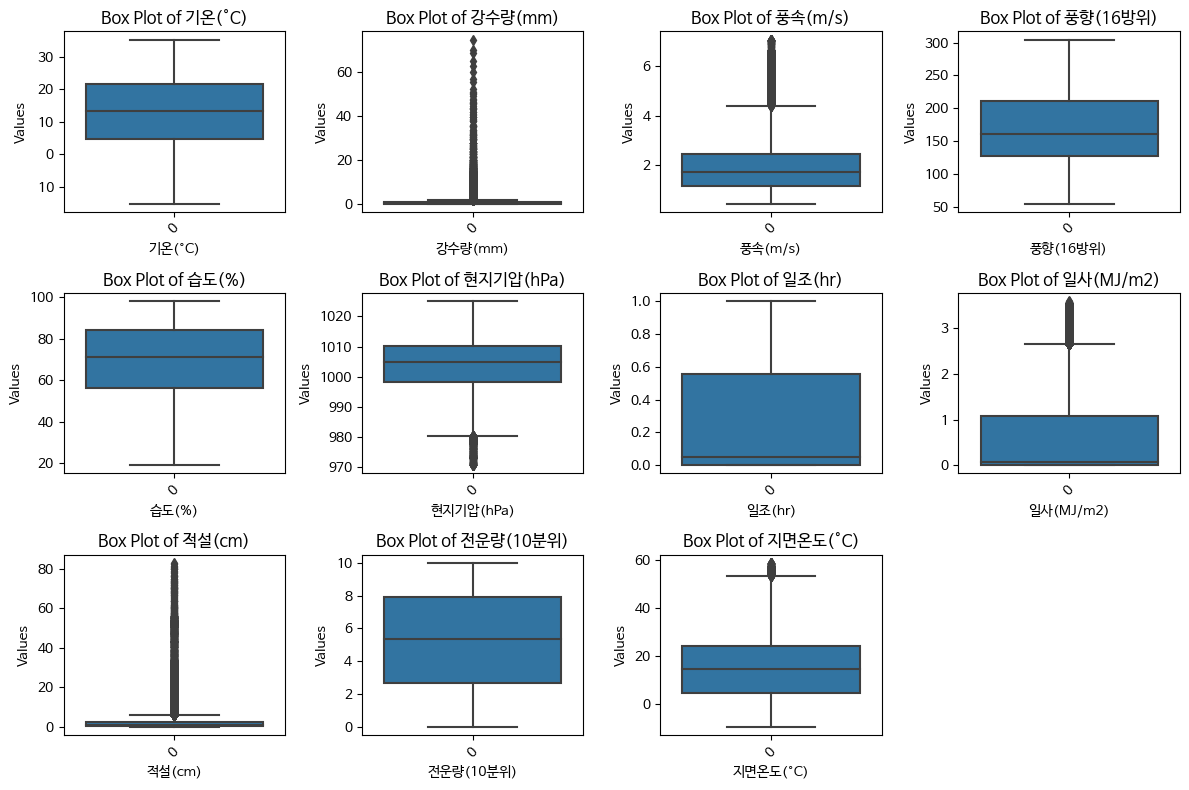

In [ ]:
# 기상데이터 이상치 탐색

# 한글폰트설정(코랩용)
plt.rc('font', family='NanumBarunGothic')

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 변수별 박스 플롯 그리기
for i, column in enumerate(weather_interpolated.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=weather_interpolated[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



* 이상치가 다수 감지된 변수들이 있음.
* 하지만 기상변수이기 때문에 정상값일 수 있음.
* 강수량이나 적설량은 내리지 않는 날이 많아서 중간값이 0에 가깝고 내린날이     두드러져 보임.   이상치로 보기 힘들다.
* 일사의 경우 앞서 본대로 QC플래그도 결측이나 의미를 알 수 없는 값이    많아 품질검사가 무의미 함.
* 기상변수는 성능평가하면서 개량.


### 5) 기상데이터 스케일링 및 상관관계 분석

* 기온변수간 단위가 달라 스케일링이 필요하다.
* 기본적으로 MInMaxScaler로 스케일링.
* 기상 변수 특성을 살펴보면 위의 히스토그램, 박스플롯에서 알 수 있듯 비대칭 분포인 경우가 많다.
* 로그변환과 박스콕스 변환을 통해 정규화를 시킬것.
* 풍향은 변수특성상 스케일링에 적절치 않아 일단 제외.

In [ ]:
# 풍향제외데이터
weather_interpolated_nwd = weather_interpolated.drop('풍향(16방위)', axis=1)
weather_interpolated_nwd

,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,
2018-01-02 00:00:00,-2.531,0.000,1.233,65.537,1015.181,0.022,0.025,1.150,0.364,-2.619
2018-01-02 00:05:00,-2.563,0.000,1.215,65.683,1015.179,0.021,0.025,1.229,0.361,-2.649
2018-01-02 00:10:00,-2.595,0.000,1.198,65.830,1015.177,0.021,0.025,1.308,0.359,-2.680
2018-01-02 00:15:00,-2.627,0.000,1.180,65.976,1015.176,0.021,0.025,1.388,0.356,-2.710
2018-01-02 00:20:00,-2.659,0.000,1.163,66.123,1015.174,0.021,0.025,1.467,0.354,-2.741
...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:40:00,4.871,0.000,0.864,68.477,1006.188,0.086,0.061,0.000,2.646,3.723
2023-03-19 23:45:00,4.794,0.000,0.866,68.750,1006.172,0.086,0.061,0.000,2.679,3.671
2023-03-19 23:50:00,4.718,0.000,0.868,69.023,1006.157,0.086,0.061,0.000,2.712,3.618



#### [1] 변수 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Min-Max Scaling을 수행할 데이터 선택
data = weather_interpolated_nwd[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '현지기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '지면온도(°C)']]

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 데이터 변환 (0~1 범위로 스케일링)
scaled_data = scaler.fit_transform(data)

# 스케일링된 데이터를 데이터프레임으로 변환
minmax_scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# 로그 변환
log_transformed_df = np.log(minmax_scaled_df)

# 박스-콕스 변환
boxcox_transformed_df = minmax_scaled_df.apply(lambda x: boxcox(x + 1)[0])  # boxcox 함수는 음수 값이나 0에 대해선 적용되지 않으므로 1을 더해줍니다.

print("MInMax와 박스콕스:")
weather_scaled = pd.DataFrame(boxcox_transformed_df)
weather_scaled

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


MInMax와 박스콕스:


,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,
2018-01-02 00:00:00,0.263,0.000,0.093,0.861,0.984,0.021,0.007,0.012,0.036,0.093
2018-01-02 00:05:00,0.262,0.000,0.091,0.864,0.984,0.021,0.007,0.012,0.036,0.093
2018-01-02 00:10:00,0.262,0.000,0.090,0.868,0.984,0.020,0.007,0.013,0.036,0.092
2018-01-02 00:15:00,0.261,0.000,0.088,0.872,0.984,0.020,0.007,0.014,0.036,0.092
2018-01-02 00:20:00,0.260,0.000,0.086,0.875,0.983,0.020,0.007,0.014,0.035,0.091
...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:40:00,0.429,0.000,0.054,0.935,0.760,0.073,0.016,0.000,0.265,0.171
2023-03-19 23:45:00,0.427,0.000,0.054,0.942,0.760,0.073,0.016,0.000,0.269,0.171
2023-03-19 23:50:00,0.425,0.000,0.054,0.949,0.759,0.073,0.016,0.000,0.272,0.170


#### [2] 상관관계분석

* 필요변수 탐색과 다중공선성 확인

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


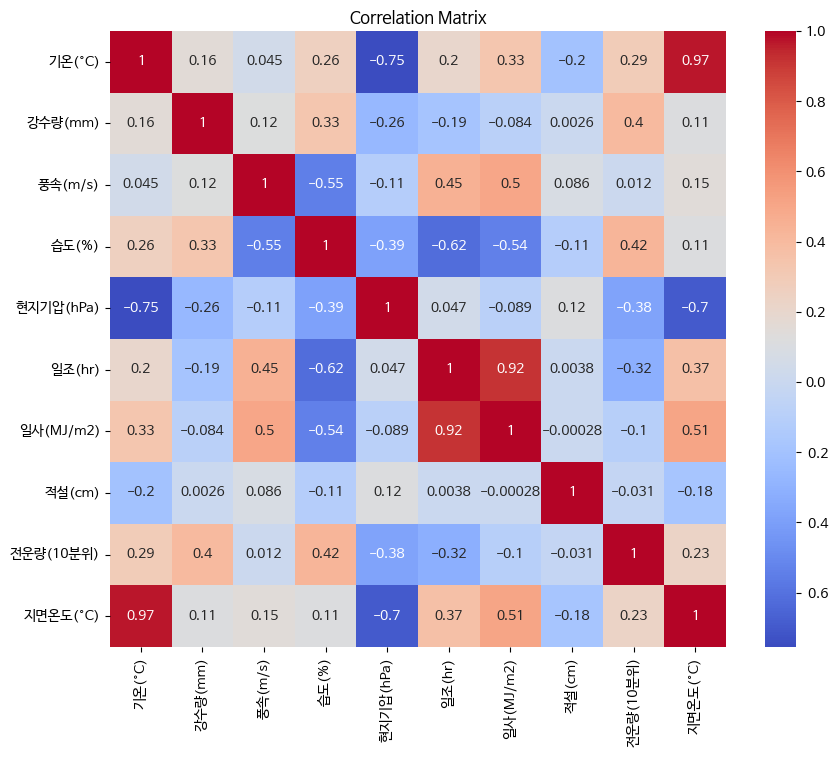

In [ ]:
# 한글폰트설정(코랩용)
plt.rc('font', family='NanumBarunGothic')

# 상관계수 행렬 계산
correlation_matrix = boxcox_transformed_df.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#### [3] 주성분분석

* 회귀모델을 적용할 경우 주성분분석을 통해 도출된 변수를 쓸 것

In [ ]:
from sklearn.decomposition import PCA

# PCA 모델 생성
pca = PCA()

# 주성분 분석을 위한 데이터 선택 (여기서는 수치형 변수들만 사용)
numerical_columns = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '현지기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '지면온도(°C)']
data_for_pca = boxcox_transformed_df[numerical_columns]

# 주성분 분석 수행
pca_result = pca.fit_transform(data_for_pca)

# 주성분 분석 결과 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("주성분 분석 결과:")
print("주성분 설명 분산 비율:", explained_variance_ratio)
print("주성분 누적 설명 분산 비율:", np.cumsum(explained_variance_ratio))

# 주성분 분석 결과를 데이터프레임으로 변환하여 출력
weather_pca = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
print("주성분 분석 결과 데이터프레임:")
weather_pca


주성분 분석 결과:
주성분 설명 분산 비율: [5.87872582e-01 2.16686405e-01 1.45901832e-01 2.77987777e-02
 1.56716171e-02 3.78561161e-03 1.32149439e-03 5.15160196e-04
 4.25922457e-04 2.05967996e-05]
주성분 누적 설명 분산 비율: [0.58787258 0.80455899 0.95046082 0.9782596  0.99393121 0.99771683
 0.99903832 0.99955348 0.9999794  1.        ]
주성분 분석 결과 데이터프레임:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.433,-0.542,-0.150,0.022,-0.051,0.002,0.018,-0.015,-0.008,-0.001
1,0.430,-0.544,-0.151,0.022,-0.050,0.003,0.018,-0.015,-0.007,-0.001
2,0.427,-0.547,-0.152,0.021,-0.050,0.004,0.018,-0.016,-0.006,-0.001
3,0.424,-0.549,-0.152,0.021,-0.049,0.006,0.018,-0.016,-0.006,-0.001
4,0.422,-0.551,-0.153,0.021,-0.049,0.007,0.019,-0.016,-0.005,-0.001
...,...,...,...,...,...,...,...,...,...,...
548060,0.199,-0.266,-0.105,0.087,-0.007,0.077,-0.005,-0.000,-0.016,-0.000
548061,0.192,-0.269,-0.103,0.087,-0.005,0.077,-0.005,-0.000,-0.016,-0.000
548062,0.185,-0.272,-0.101,0.087,-0.002,0.077,-0.005,-0.000,-0.016,-0.000
548063,0.178,-0.274,-0.099,0.087,-0.000,0.076,-0.005,0.000,-0.016,-0.000


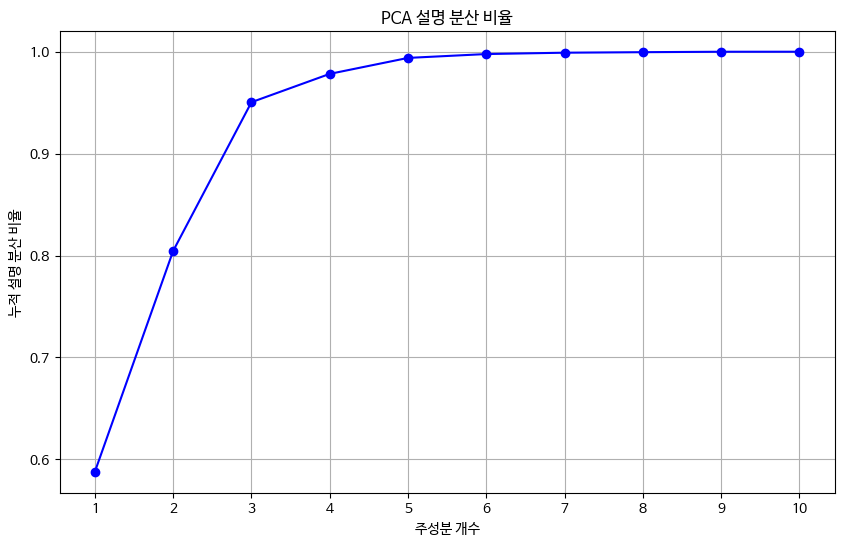

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 한글폰트설정(코랩용)
plt.rc('font', family='NanumBarunGothic')

# 주성분 누적 설명 분산 비율 추출
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Scree plot 그리기

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), cumulative_explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산 비율')
plt.title('PCA 설명 분산 비율')
plt.xticks(range(1, len(explained_variance_ratio)+1))
plt.grid(True)
plt.show()


## 3. 태양광데이터 EDA

* 5분단위 태양광 계량데이터로 태양광 발전량을 측정한 자료.

#### 1) 태양광데이터 불러오기 & 결합

In [ ]:
pd.options.display.float_format = '{:.7f}'.format

In [ ]:
# 태양광 계량데이터 결합
df_solar = pd.read_csv('지역별_5분_단위_태양광_계량데이터_(2023_01_01 ~ 2023_05_31).csv',encoding = 'cp949')
df_solar2 = pd.read_csv('지역별_5분_단위_태양광_계량데이터_(2022_01_01 ~ 2022_12_31).csv',encoding = 'cp949')
df_solar3 = pd.read_csv('지역별_5분_단위_태양광_계량데이터_(2021_01_01 ~ 2021_12_31).csv',encoding = 'cp949')
df_solar4 = pd.read_csv('지역별_5분_단위_태양광_계량데이터_(2020_01_01 ~ 2020_12_31).csv',encoding = 'cp949')
df_solar5 = pd.read_csv('2015.08~2020.08 태양광 일별 시간대별 5분계량자료.csv',encoding = 'cp949')
merge_solar = pd.concat([df_solar ,df_solar2 ,df_solar3 ,df_solar4 ,df_solar5 ])
merge_solar = merge_solar.drop(['연료원','지역'], axis = 1)
merge_solar

,거래일,시간,0,5,10,15,20,25,30,35,40,45,50,55,60
0,2023-01-01,0,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,NaN
1,2023-01-01,1,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,NaN
2,2023-01-01,2,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,NaN
3,2023-01-01,3,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,NaN
4,2023-01-01,4,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44419,2020-08-24,19,NaN,76193526.0800000,80622590.4400000,82121101.0100000,81525732.0600000,81471106.7600000,80738654.6000000,79513854.1400000,74183220.4900000,72160869.9400000,71834128.1100000,69819267.6700000,67606977.3900000
44420,2020-08-24,20,NaN,68407678.2700000,68410861.8800000,67728763.1900000,66239694.0100000,65531689.9800000,64805866.7400000,63263726.4100000,61771067.5900000,60471645.0500000,59277986.3100000,58006419.3200000,56365875.6000000
44421,2020-08-24,21,NaN,54462725.0700000,50605569.6800000,48370831.8300000,45664042.1600000,42822249.4000000,40907648.3100000,38187438.1600000,33121789.5200000,27318402.4600000,22711348.3100000,19832185.0300000,17835006.1800000
44422,2020-08-24,22,NaN,16094075.2000000,14722145.0900000,13442128.3300000,12381587.8500000,11836783.3200000,11141022.0700000,10245953.4300000,9645420.3890000,9368561.0630000,9086025.2630000,8662948.8840000,8312132.4000000


In [ ]:
# datetime 칼럼을 갖기위해 정리
merge_solar['시간'] = merge_solar['시간'].astype(str).str.zfill(2)
merge_solar['일시'] = pd.to_datetime(merge_solar['거래일'].astype(str) + ' ' + merge_solar['시간'].astype(str))
merge_solar = merge_solar.drop(['거래일','시간'], axis =1)
merge_solar.head()

,0,5,10,15,20,25,30,35,40,45,50,55,60,일시
0,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,NaN,2023-01-01 00:00:00
1,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,NaN,2023-01-01 01:00:00
2,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,NaN,2023-01-01 02:00:00
3,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,NaN,2023-01-01 03:00:00
4,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,NaN,2023-01-01 04:00:00


In [ ]:
# 열 위치 변
new_column_order = ['일시', '0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55','60']
merge_solar = merge_solar[new_column_order]
merge_solar.head()

,일시,0,5,10,15,20,25,30,35,40,45,50,55,60
0,2023-01-01 00:00:00,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,80312.5789500,NaN
1,2023-01-01 01:00:00,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,33583.4736900,NaN
2,2023-01-01 02:00:00,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,39389.8421100,NaN
3,2023-01-01 03:00:00,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,36095.5263200,NaN
4,2023-01-01 04:00:00,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,34937.6315800,NaN


In [ ]:
# 여러 측정지점이 있어서 일시를 기준으로 그룹화하고 평균 계산
grouped = merge_solar.groupby('일시').mean().reset_index()

# 데이터프레임을 재구성하여 행을 열로 만들고 밑으로 붙이기
melted_solar = grouped.melt(id_vars='일시', var_name='분', value_name='발전량')

# datetime 칼럼 망들기
melted_solar['분'] = melted_solar['분'].astype(int)
melted_solar['일시'] = pd.to_datetime(melted_solar['일시']) + pd.to_timedelta(melted_solar['분'], unit='m')

# 데이터 오름차순 정리 및 재인덱스
solar_df = melted_solar.sort_values(by='일시', ascending=True)
solar_df = solar_df.drop('분',axis = 1)
solar_df = solar_df.reset_index()
solar_df = solar_df.drop('index', axis = 1)
solar_df

,일시,발전량
0,2015-08-01 00:00:00,NaN
1,2015-08-01 00:05:00,3320.0000000
2,2015-08-01 00:10:00,4268.0000000
3,2015-08-01 00:15:00,4012.8000000
4,2015-08-01 00:20:00,4427.2000000
...,...,...
778747,2023-05-31 23:40:00,901663.1681054
778748,2023-05-31 23:45:00,901663.1681054
778749,2023-05-31 23:50:00,901663.1681054
778750,2023-05-31 23:55:00,901663.1681054


In [ ]:
grouped_df = solar_df.groupby(solar_df.index)

#### 2) 태양광데이터 탐색

In [ ]:
# 데이터 크기
solar_df.shape

(778752, 2)

In [ ]:
# 데이터 정보
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778752 entries, 0 to 778751
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   일시      778752 non-null  datetime64[ns]
 1   발전량     724536 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.9 MB


In [ ]:
# 결측값 확인
solar_df.isnull().sum()

일시         0
발전량    54216
dtype: int64

In [ ]:
# 데이터 통계량
solar_df.describe()

,발전량
count,724536.0000000
mean,18656202.4960657
std,31446755.1098414
min,0.0000000
25%,30376.0066753
50%,3110494.4557118
75%,20685112.4150000
max,243820593.1000000


In [ ]:
# datetime 인덱스 설정
solar_df.set_index('일시', inplace=True)
solar_df

,발전량
일시,
2015-08-01 00:00:00,NaN
2015-08-01 00:05:00,3320.0000000
2015-08-01 00:10:00,4268.0000000
2015-08-01 00:15:00,4012.8000000
2015-08-01 00:20:00,4427.2000000
...,...
2023-05-31 23:40:00,901663.1681054
2023-05-31 23:45:00,901663.1681054
2023-05-31 23:50:00,901663.1681054


In [ ]:
solar_df = solar_df.fillna(0)
solar_df

,발전량
일시,
2015-08-01 00:00:00,0.0000000
2015-08-01 00:05:00,3320.0000000
2015-08-01 00:10:00,4268.0000000
2015-08-01 00:15:00,4012.8000000
2015-08-01 00:20:00,4427.2000000
...,...
2023-05-31 23:40:00,901663.1681054
2023-05-31 23:45:00,901663.1681054
2023-05-31 23:50:00,901663.1681054


In [ ]:
solar_df

,발전량
일시,
2015-08-01 00:00:00,0.0000000
2015-08-01 00:05:00,3320.0000000
2015-08-01 00:10:00,4268.0000000
2015-08-01 00:15:00,4012.8000000
2015-08-01 00:20:00,4427.2000000
...,...
2023-05-31 23:40:00,901663.1681054
2023-05-31 23:45:00,901663.1681054
2023-05-31 23:50:00,901663.1681054


In [ ]:
duplicates = solar_df.index.duplicated(keep=False)
duplicate_rows = solar_df[duplicates]
duplicate_rows

,발전량
일시,
2015-08-01 01:00:00,0.0000000
2015-08-01 01:00:00,3819.2000000
2015-08-01 02:00:00,0.0000000
2015-08-01 02:00:00,2101.6000000
2015-08-01 03:00:00,0.0000000
...,...
2023-05-31 21:00:00,4906291.2129388
2023-05-31 22:00:00,3082232.0925153
2023-05-31 22:00:00,0.0000000


In [ ]:
grouped_df = solar_df.groupby(solar_df.index)
filtered_df2 = grouped_df.filter(lambda x: len(x) > 1)
filtered_df2

,발전량
일시,
2015-08-01 01:00:00,0.0000000
2015-08-01 01:00:00,3819.2000000
2015-08-01 02:00:00,0.0000000
2015-08-01 02:00:00,2101.6000000
2015-08-01 03:00:00,0.0000000
...,...
2023-05-31 21:00:00,4906291.2129388
2023-05-31 22:00:00,3082232.0925153
2023-05-31 22:00:00,0.0000000


In [ ]:
solar_df.index

DatetimeIndex(['2015-08-01 00:00:00', '2015-08-01 00:05:00',
               '2015-08-01 00:10:00', '2015-08-01 00:15:00',
               '2015-08-01 00:20:00', '2015-08-01 00:25:00',
               '2015-08-01 00:30:00', '2015-08-01 00:35:00',
               '2015-08-01 00:40:00', '2015-08-01 00:45:00',
               ...
               '2023-05-31 23:15:00', '2023-05-31 23:20:00',
               '2023-05-31 23:25:00', '2023-05-31 23:30:00',
               '2023-05-31 23:35:00', '2023-05-31 23:40:00',
               '2023-05-31 23:45:00', '2023-05-31 23:50:00',
               '2023-05-31 23:55:00', '2023-06-01 00:00:00'],
              dtype='datetime64[ns]', name='일시', length=778752, freq=None)

In [ ]:
solar_df.index.value_counts()

2022-07-11 16:00:00    2
2022-11-01 15:00:00    2
2022-11-01 14:00:00    2
2019-08-19 22:00:00    2
2017-01-26 19:00:00    2
                      ..
2017-12-16 04:15:00    1
2017-12-16 04:20:00    1
2017-12-16 04:25:00    1
2017-12-16 04:30:00    1
2023-06-01 00:00:00    1
Name: 일시, Length: 718850, dtype: int64

In [ ]:
dup_index = solar_df.index[solar_df.index.value_counts() == 2]
dup_index

IndexError: ignored

### 3) 변수 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Min-Max Scaling을 수행할 데이터 선택
data = solar_df[['발전량']]

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 데이터 변환 (0~1 범위로 스케일링)
scaled_data = scaler.fit_transform(data)

# 스케일링된 데이터를 데이터프레임으로 변환
minmax_scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# 로그 변환
log_transformed_df = np.log(minmax_scaled_df)

# 박스-콕스 변환
boxcox_transformed_df = minmax_scaled_df.apply(lambda x: boxcox(x + 1)[0])  # boxcox 함수는 음수 값이나 0에 대해선 적용되지 않으므로 1을 더해줍니다.

print("MInMax와 박스콕스:")
solar_scaled = pd.DataFrame(boxcox_transformed_df)
solar_scaled

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


MInMax와 박스콕스:


,발전량
일시,
2015-08-01 00:00:00,NaN
2015-08-01 00:05:00,0.0000136
2015-08-01 00:10:00,0.0000175
2015-08-01 00:15:00,0.0000165
2015-08-01 00:20:00,0.0000182
...,...
2023-05-31 23:40:00,0.0037496
2023-05-31 23:45:00,0.0037496
2023-05-31 23:50:00,0.0037496


## 4. SMP데이터 EDA

* SMP(System Marginal Price)란 계통한계가격으로 한국전력에서 판매하는 전력도매가격

### 1) SMP데이터 불러오기 & 결합

In [ ]:
# SMP데이터 결합
df_e_cost =  pd.read_csv('smp2018.csv')
df_e_cost2 =  pd.read_csv('smp2019.csv')
df_e_cost3 =  pd.read_csv('smp2020.csv')
df_e_cost4 =  pd.read_csv('smp2021.csv')
df_e_cost5 =  pd.read_csv('smp2022.csv')
df_e_cost6 =  pd.read_csv('smp2023.csv')
merge_e_cost = pd.concat([df_e_cost ,df_e_cost2 ,df_e_cost3 ,df_e_cost4 ,df_e_cost5 ,df_e_cost6 ])
merge_e_cost = merge_e_cost.drop(['최소','최대','평균'], axis = 1)
merge_e_cost

,구분,1h,2h,3h,4h,5h,6h,7h,8h,9h,...,15h,16h,17h,18h,19h,20h,21h,22h,23h,24h
0,20180101,89.6600000,89.5400000,89.6600000,85.3300000,85.3300000,85.3300000,85.3300000,85.1500000,84.1700000,...,74.1000000,79.4200000,85.2500000,86.7800000,87.1400000,87.1400000,87.1400000,87.1400000,89.8000000,95.9300000
1,20180102,92.2600000,89.0400000,88.3600000,88.3600000,88.3600000,88.3600000,89.2600000,92.3900000,93.4800000,...,94.5800000,93.6600000,95.7000000,95.6900000,93.1700000,92.4100000,91.4000000,91.6600000,90.5300000,95.6900000
2,20180103,92.7900000,90.1600000,88.3700000,88.3700000,88.3700000,91.2800000,88.3700000,93.1100000,93.7400000,...,93.2400000,93.2400000,96.4700000,95.6900000,92.6700000,91.7000000,90.8200000,89.2100000,88.9500000,95.6900000
3,20180104,92.0600000,92.0600000,88.3700000,88.3700000,88.3700000,90.6600000,88.3700000,91.8500000,93.2600000,...,93.7300000,93.1400000,93.7300000,93.5500000,93.7300000,93.0300000,90.7700000,88.9700000,88.9200000,93.2600000
4,20180105,90.7100000,94.0700000,88.4000000,88.2300000,88.4000000,88.8300000,91.7000000,90.7500000,93.1300000,...,94.0700000,93.8000000,95.6900000,96.1200000,93.1500000,93.1500000,91.6000000,90.7300000,90.0000000,95.6900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,20230706,134.0100000,118.6000000,118.0400000,114.7300000,114.7300000,118.6000000,118.5800000,119.3300000,160.1700000,...,167.9900000,168.7800000,177.2700000,173.9200000,167.7600000,165.2900000,160.3100000,159.8800000,159.2600000,142.0500000
187,20230707,164.9900000,131.3400000,131.3400000,130.5800000,130.5800000,130.8400000,131.3400000,155.9800000,160.5000000,...,170.6100000,169.9700000,170.0300000,170.6100000,169.9600000,168.8000000,163.5300000,162.7800000,160.5100000,160.2200000
188,20230708,160.9200000,131.9600000,131.9600000,122.4400000,118.5900000,118.6000000,123.9800000,153.9600000,162.6300000,...,168.3400000,167.9000000,162.6400000,162.6500000,168.3000000,168.3100000,162.6000000,161.2200000,161.0400000,158.2900000
189,20230709,166.5800000,119.8200000,119.4300000,119.0600000,112.4800000,112.4800000,119.2500000,119.2400000,130.6400000,...,163.7500000,163.7500000,168.7800000,168.8000000,168.8000000,168.8300000,168.8100000,163.5900000,163.3600000,124.9700000


In [ ]:
# 역시 datetime과 값으로 구

# 데이터프레임을 재구성하여 행을 열로 만들고 밑으로 붙이기
merge_e_cost2 = merge_e_cost.melt(id_vars='구분', var_name='시간', value_name='smp(원/kWh)')

# datetime형식으로 데이터 정리
merge_e_cost2['시간'] = merge_e_cost2['시간'].str[:-1]
merge_e_cost2['시간'] = merge_e_cost2['시간'].replace('24', '00')
merge_e_cost2['시간'] = merge_e_cost2['시간'].astype(str).str.zfill(2)
merge_e_cost2['일시'] = pd.to_datetime(merge_e_cost2['구분'].astype(str) + ' ' + merge_e_cost2['시간'].astype(str))
merge_e_cost2.drop(['구분','시간'], axis = 1)

# 열 위치 바꾸기
new_order = ['일시', 'smp(원/kWh)']
merge_e_cost2 = merge_e_cost2.reindex(columns=new_order)

# 오름차순 및 재인덱스
smp_df = merge_e_cost2.sort_values(by='일시')
smp_df = smp_df.reset_index()
smp_df = smp_df.drop('index', axis = 1)
smp_df

,일시,smp(원/kWh)
0,2018-01-01 00:00:00,95.9300000
1,2018-01-01 01:00:00,89.6600000
2,2018-01-01 02:00:00,89.5400000
3,2018-01-01 03:00:00,89.6600000
4,2018-01-01 04:00:00,85.3300000
...,...,...
48403,2023-07-10 19:00:00,168.2200000
48404,2023-07-10 20:00:00,168.2200000
48405,2023-07-10 21:00:00,164.3400000
48406,2023-07-10 22:00:00,159.3300000


In [ ]:
# datetime 인덱스 변환
smp_df.index = pd.to_datetime(smp_df.index)

# datetime 인덱스 설정
smp_df.set_index('일시', inplace=True)
smp_df

# 5분 단위로 보간(interpolation)
smp_df = smp_df.resample('5T').interpolate()
smp_df

,smp(원/kWh)
일시,
2018-01-01 00:00:00,95.9300000
2018-01-01 00:05:00,95.4075000
2018-01-01 00:10:00,94.8850000
2018-01-01 00:15:00,94.3625000
2018-01-01 00:20:00,93.8400000
...,...
2023-07-10 22:40:00,159.2833333
2023-07-10 22:45:00,159.2775000
2023-07-10 22:50:00,159.2716667


### 2) SMP데이터 탐색

In [ ]:
# 데이터 크기
smp_df.shape

(580885, 1)

In [ ]:
# 데이터 정보
smp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 580885 entries, 2018-01-01 00:00:00 to 2023-07-10 23:00:00
Freq: 5T
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   smp(원/kWh)  580885 non-null  float64
dtypes: float64(1)
memory usage: 8.9 MB


In [ ]:
# 결측값 확인
smp_df.isnull().sum()

smp(원/kWh)    0
dtype: int64

In [ ]:
# 데이터 통계량
smp_df.describe()

,smp(원/kWh)
count,580885.0000000
mean,115.2077895
std,56.9641952
min,7.8400000
25%,80.1700000
50%,92.9375000
75%,134.6733333
max,359.5000000


### 3) 변수 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Min-Max Scaling을 수행할 데이터 선택
data = smp_df[['smp(원/kWh)']]

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 데이터 변환 (0~1 범위로 스케일링)
scaled_data = scaler.fit_transform(data)

# 스케일링된 데이터를 데이터프레임으로 변환
minmax_scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# 로그 변환
log_transformed_df = np.log(minmax_scaled_df)

# 박스-콕스 변환
boxcox_transformed_df = minmax_scaled_df.apply(lambda x: boxcox(x + 1)[0])  # boxcox 함수는 음수 값이나 0에 대해선 적용되지 않으므로 1을 더해줍니다.

print("MInMax와 박스콕스:")
smp_scaled = pd.DataFrame(boxcox_transformed_df)
smp_scaled

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


MInMax와 박스콕스:


,smp(원/kWh)
일시,
2018-01-01 00:00:00,0.1300754
2018-01-01 00:05:00,0.1297168
2018-01-01 00:10:00,0.1293555
2018-01-01 00:15:00,0.1289915
2018-01-01 00:20:00,0.1286247
...,...
2023-07-10 22:40:00,0.1588699
2023-07-10 22:45:00,0.1588682
2023-07-10 22:50:00,0.1588665


## 5. 총 데이터 결합

In [ ]:
ED_2018_2023.set_index('기준일시', inplace=True)
ED_2018_2023

KeyError: ignored

In [ ]:
# 인덱스 이름 변경
ED_2018_2023 = ED_2018_2023.rename_axis(index='일시')
ED_2018_2023

,현재수요(MW)
일시,
2018-01-01 00:00:00,60955.0000000
2018-01-01 00:05:00,60964.3000000
2018-01-01 00:10:00,60745.9000000
2018-01-01 00:15:00,60170.5000000
2018-01-01 00:20:00,60067.7000000
...,...
2023-03-19 23:35:00,58627.1600000
2023-03-19 23:40:00,57941.2400000
2023-03-19 23:45:00,57726.2100000


In [ ]:
solar_scaled

,발전량
일시,
2015-08-01 00:00:00,NaN
2015-08-01 00:05:00,0.0000136
2015-08-01 00:10:00,0.0000175
2015-08-01 00:15:00,0.0000165
2015-08-01 00:20:00,0.0000182
...,...
2023-05-31 23:40:00,0.0037496
2023-05-31 23:45:00,0.0037496
2023-05-31 23:50:00,0.0037496


In [ ]:
weather_scaled

,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,
2018-01-02 00:00:00,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079
2018-01-02 00:05:00,0.2623664,0.0000000,0.0912185,0.8644642,0.9836267,0.0205120,0.0068459,0.0124298,0.0361251,0.0925116
2018-01-02 00:10:00,0.2616630,0.0000000,0.0895248,0.8680961,0.9835797,0.0203053,0.0068463,0.0130875,0.0358724,0.0921151
2018-01-02 00:15:00,0.2609597,0.0000000,0.0878144,0.8717340,0.9835328,0.0200984,0.0068466,0.0137303,0.0356197,0.0917184
2018-01-02 00:20:00,0.2602566,0.0000000,0.0860870,0.8753781,0.9834858,0.0198913,0.0068470,0.0143584,0.0353669,0.0913215
...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:40:00,0.4288152,0.0000000,0.0536909,0.9347869,0.7600830,0.0728041,0.0160935,0.0000000,0.2652626,0.1711693
2023-03-19 23:45:00,0.4270664,0.0000000,0.0539086,0.9417735,0.7597114,0.0728041,0.0160935,0.0000000,0.2686130,0.1705570
2023-03-19 23:50:00,0.4253183,0.0000000,0.0541260,0.9487815,0.7593398,0.0728041,0.0160935,0.0000000,0.2719637,0.1699442


In [ ]:
smp_scaled

,smp(원/kWh)
일시,
2018-01-01 00:00:00,0.1300754
2018-01-01 00:05:00,0.1297168
2018-01-01 00:10:00,0.1293555
2018-01-01 00:15:00,0.1289915
2018-01-01 00:20:00,0.1286247
...,...
2023-07-10 22:40:00,0.1588699
2023-07-10 22:45:00,0.1588682
2023-07-10 22:50:00,0.1588665


In [ ]:
merged_df1 = ED_2018_2023.merge(weather_scaled, left_index=True, right_index=True, how='outer')
merged_df1

,현재수요(MW),기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-01 00:00:00,60955.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:05:00,60964.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:10:00,60745.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:15:00,60170.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:20:00,60067.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:40:00,57941.240,0.429,0.000,0.054,0.935,0.760,0.073,0.016,0.000,0.265,0.171
2023-03-19 23:45:00,57726.210,0.427,0.000,0.054,0.942,0.760,0.073,0.016,0.000,0.269,0.171
2023-03-19 23:50:00,57755.400,0.425,0.000,0.054,0.949,0.759,0.073,0.016,0.000,0.272,0.170


In [ ]:
merged_df1 = merged_df1.dropna(axis=0)
merged_df1

,현재수요(MW),기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-02 00:00:00,60769.4000000,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079
2018-01-02 00:05:00,60556.6000000,0.2623664,0.0000000,0.0912185,0.8644642,0.9836267,0.0205120,0.0068459,0.0124298,0.0361251,0.0925116
2018-01-02 00:10:00,60158.7000000,0.2616630,0.0000000,0.0895248,0.8680961,0.9835797,0.0203053,0.0068463,0.0130875,0.0358724,0.0921151
2018-01-02 00:15:00,59842.3000000,0.2609597,0.0000000,0.0878144,0.8717340,0.9835328,0.0200984,0.0068466,0.0137303,0.0356197,0.0917184
2018-01-02 00:20:00,59771.7000000,0.2602566,0.0000000,0.0860870,0.8753781,0.9834858,0.0198913,0.0068470,0.0143584,0.0353669,0.0913215
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:35:00,58627.1600000,0.4305649,0.0000000,0.0534731,0.9278217,0.7604547,0.0728041,0.0160935,0.0000000,0.2619123,0.1717810
2023-03-19 23:40:00,57941.2400000,0.4288152,0.0000000,0.0536909,0.9347869,0.7600830,0.0728041,0.0160935,0.0000000,0.2652626,0.1711693
2023-03-19 23:45:00,57726.2100000,0.4270664,0.0000000,0.0539086,0.9417735,0.7597114,0.0728041,0.0160935,0.0000000,0.2686130,0.1705570


In [ ]:
solar_scaled

,발전량
일시,
2015-08-01 00:00:00,NaN
2015-08-01 00:05:00,0.0000136
2015-08-01 00:10:00,0.0000175
2015-08-01 00:15:00,0.0000165
2015-08-01 00:20:00,0.0000182
...,...
2023-05-31 23:40:00,0.0037496
2023-05-31 23:45:00,0.0037496
2023-05-31 23:50:00,0.0037496


In [ ]:
solar_scaled = solar_scaled.fillna(0)
solar_scaled

,발전량
일시,
2015-08-01 00:00:00,0.0000000
2015-08-01 00:05:00,0.0000136
2015-08-01 00:10:00,0.0000175
2015-08-01 00:15:00,0.0000165
2015-08-01 00:20:00,0.0000182
...,...
2023-05-31 23:40:00,0.0037496
2023-05-31 23:45:00,0.0037496
2023-05-31 23:50:00,0.0037496


In [ ]:
len(solar_scaled.index.value_counts() == 2)

718850

In [ ]:
merged_df2 =  merged_df1.merge(solar_scaled, left_index=True, right_index=True, how='outer')
merged_df2

,현재수요(MW),기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),발전량
일시,,,,,,,,,,,,
2015-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000000
2015-08-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000136
2015-08-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000175
2015-08-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000165
2015-08-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000182
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0037496
2023-05-31 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0037496
2023-05-31 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0037496


In [ ]:
merged_df2 = merged_df2.dropna(axis=0)
merged_df2

,현재수요(MW),기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),발전량
일시,,,,,,,,,,,,
2018-01-02 00:00:00,60769.4000000,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079,0.0000242
2018-01-02 00:00:00,60769.4000000,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079,0.0000000
2018-01-02 00:05:00,60556.6000000,0.2623664,0.0000000,0.0912185,0.8644642,0.9836267,0.0205120,0.0068459,0.0124298,0.0361251,0.0925116,0.0000248
2018-01-02 00:10:00,60158.7000000,0.2616630,0.0000000,0.0895248,0.8680961,0.9835797,0.0203053,0.0068463,0.0130875,0.0358724,0.0921151,0.0000262
2018-01-02 00:15:00,59842.3000000,0.2609597,0.0000000,0.0878144,0.8717340,0.9835328,0.0200984,0.0068466,0.0137303,0.0356197,0.0917184,0.0000264
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:35:00,58627.1600000,0.4305649,0.0000000,0.0534731,0.9278217,0.7604547,0.0728041,0.0160935,0.0000000,0.2619123,0.1717810,0.0038425
2023-03-19 23:40:00,57941.2400000,0.4288152,0.0000000,0.0536909,0.9347869,0.7600830,0.0728041,0.0160935,0.0000000,0.2652626,0.1711693,0.0038425
2023-03-19 23:45:00,57726.2100000,0.4270664,0.0000000,0.0539086,0.9417735,0.7597114,0.0728041,0.0160935,0.0000000,0.2686130,0.1705570,0.0038425


In [ ]:
merged_df3 = merged_df2.merge(smp_scaled, left_index=True, right_index=True, how='outer')
merged_df3

,현재수요(MW),기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),발전량,smp(원/kWh)
일시,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1300754
2018-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1297168
2018-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1293555
2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1289915
2018-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1286247
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10 22:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1588699
2023-07-10 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1588682
2023-07-10 22:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1588665


In [ ]:
merged_df3 = merged_df3.dropna(axis=0)
merged_df = merged_df3
merged_df

,현재수요(MW),기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),발전량,smp(원/kWh)
일시,,,,,,,,,,,,,
2018-01-02 00:00:00,60769.4000000,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079,0.0000242,0.1299110
2018-01-02 00:00:00,60769.4000000,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079,0.0000000,0.1299110
2018-01-02 00:05:00,60556.6000000,0.2623664,0.0000000,0.0912185,0.8644642,0.9836267,0.0205120,0.0068459,0.0124298,0.0361251,0.0925116,0.0000248,0.1297145
2018-01-02 00:10:00,60158.7000000,0.2616630,0.0000000,0.0895248,0.8680961,0.9835797,0.0203053,0.0068463,0.0130875,0.0358724,0.0921151,0.0000262,0.1295172
2018-01-02 00:15:00,59842.3000000,0.2609597,0.0000000,0.0878144,0.8717340,0.9835328,0.0200984,0.0068466,0.0137303,0.0356197,0.0917184,0.0000264,0.1293191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:35:00,58627.1600000,0.4305649,0.0000000,0.0534731,0.9278217,0.7604547,0.0728041,0.0160935,0.0000000,0.2619123,0.1717810,0.0038425,0.1699933
2023-03-19 23:40:00,57941.2400000,0.4288152,0.0000000,0.0536909,0.9347869,0.7600830,0.0728041,0.0160935,0.0000000,0.2652626,0.1711693,0.0038425,0.1712543
2023-03-19 23:45:00,57726.2100000,0.4270664,0.0000000,0.0539086,0.9417735,0.7597114,0.0728041,0.0160935,0.0000000,0.2686130,0.1705570,0.0038425,0.1723991


In [ ]:
merged_df['년'] = merged_df.index.year
merged_df['월'] = merged_df.index.month
merged_df['주'] = merged_df.index.week
merged_df['일'] = merged_df.index.day
merged_df['시간'] = merged_df.index.hour


<ipython-input-134-04214829d2f9>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  merged_df['주'] = merged_df.index.week


In [ ]:
merged_df

,현재수요(MW),기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),발전량,smp(원/kWh),년,월,주,일,시간
일시,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,60769.4000000,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079,0.0000242,0.1299110,2018,1,1,2,0
2018-01-02 00:00:00,60769.4000000,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079,0.0000000,0.1299110,2018,1,1,2,0
2018-01-02 00:05:00,60556.6000000,0.2623664,0.0000000,0.0912185,0.8644642,0.9836267,0.0205120,0.0068459,0.0124298,0.0361251,0.0925116,0.0000248,0.1297145,2018,1,1,2,0
2018-01-02 00:10:00,60158.7000000,0.2616630,0.0000000,0.0895248,0.8680961,0.9835797,0.0203053,0.0068463,0.0130875,0.0358724,0.0921151,0.0000262,0.1295172,2018,1,1,2,0
2018-01-02 00:15:00,59842.3000000,0.2609597,0.0000000,0.0878144,0.8717340,0.9835328,0.0200984,0.0068466,0.0137303,0.0356197,0.0917184,0.0000264,0.1293191,2018,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:35:00,58627.1600000,0.4305649,0.0000000,0.0534731,0.9278217,0.7604547,0.0728041,0.0160935,0.0000000,0.2619123,0.1717810,0.0038425,0.1699933,2023,3,11,19,23
2023-03-19 23:40:00,57941.2400000,0.4288152,0.0000000,0.0536909,0.9347869,0.7600830,0.0728041,0.0160935,0.0000000,0.2652626,0.1711693,0.0038425,0.1712543,2023,3,11,19,23
2023-03-19 23:45:00,57726.2100000,0.4270664,0.0000000,0.0539086,0.9417735,0.7597114,0.0728041,0.0160935,0.0000000,0.2686130,0.1705570,0.0038425,0.1723991,2023,3,11,19,23


In [ ]:
# 휴일 추가

In [ ]:
import holidays

# 휴일 정보 로드
kr_holidays = holidays.Korea()

# 휴일 여부 확인하여 휴일 변수 생성
merged_df['휴일'] = merged_df.index.map(lambda x: 1 if x in kr_holidays else 0)
merged_df

,현재수요(MW),기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),발전량,smp(원/kWh),년,월,주,일,시간,휴일
일시,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,60769.4000000,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079,0.0000242,0.1299110,2018,1,1,2,0,0
2018-01-02 00:00:00,60769.4000000,0.2630699,0.0000000,0.0928956,0.8608385,0.9836737,0.0207185,0.0068455,0.0117568,0.0363778,0.0929079,0.0000000,0.1299110,2018,1,1,2,0,0
2018-01-02 00:05:00,60556.6000000,0.2623664,0.0000000,0.0912185,0.8644642,0.9836267,0.0205120,0.0068459,0.0124298,0.0361251,0.0925116,0.0000248,0.1297145,2018,1,1,2,0,0
2018-01-02 00:10:00,60158.7000000,0.2616630,0.0000000,0.0895248,0.8680961,0.9835797,0.0203053,0.0068463,0.0130875,0.0358724,0.0921151,0.0000262,0.1295172,2018,1,1,2,0,0
2018-01-02 00:15:00,59842.3000000,0.2609597,0.0000000,0.0878144,0.8717340,0.9835328,0.0200984,0.0068466,0.0137303,0.0356197,0.0917184,0.0000264,0.1293191,2018,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:35:00,58627.1600000,0.4305649,0.0000000,0.0534731,0.9278217,0.7604547,0.0728041,0.0160935,0.0000000,0.2619123,0.1717810,0.0038425,0.1699933,2023,3,11,19,23,0
2023-03-19 23:40:00,57941.2400000,0.4288152,0.0000000,0.0536909,0.9347869,0.7600830,0.0728041,0.0160935,0.0000000,0.2652626,0.1711693,0.0038425,0.1712543,2023,3,11,19,23,0
2023-03-19 23:45:00,57726.2100000,0.4270664,0.0000000,0.0539086,0.9417735,0.7597114,0.0728041,0.0160935,0.0000000,0.2686130,0.1705570,0.0038425,0.1723991,2023,3,11,19,23,0


# Xgboost

In [ ]:
merged_df.head()

In [ ]:
list_v  = list(merged_df.columns)
value_to_remove = '현재수요(MW)'
list_v.remove(value_to_remove)
list_v

['기온(°C)',
 '강수량(mm)',
 '풍속(m/s)',
 '습도(%)',
 '현지기압(hPa)',
 '일조(hr)',
 '일사(MJ/m2)',
 '적설(cm)',
 '전운량(10분위)',
 '지면온도(°C)',
 '발전량',
 'smp(원/kWh)',
 '년',
 '월',
 '주',
 '일',
 '시간',
 '휴일']

In [ ]:
filtered_df

,기준일시,현재수요(MW)
1132721,2023-03-13 00:00:00,58782.0300000
1132722,2023-03-13 00:05:00,58954.4400000
1132723,2023-03-13 00:10:00,58710.5800000
1132724,2023-03-13 00:15:00,58298.4400000
1132725,2023-03-13 00:20:00,58263.7000000
...,...,...
1134732,2023-03-19 23:35:00,58627.1600000
1134733,2023-03-19 23:40:00,57941.2400000
1134734,2023-03-19 23:45:00,57726.2100000
1134735,2023-03-19 23:50:00,57755.4000000


In [ ]:
start_date = '2023-03-13'
end_date = '2023-03-19'
filtered_df2 = merged_df.loc[start_date:end_date]
filtered_df2

,현재수요(MW),기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),발전량,smp(원/kWh),년,월,주,일,시간,휴일
일시,,,,,,,,,,,,,,,,,,,
2023-03-13 00:00:00,58782.0300000,0.3532547,0.0048168,0.2558648,0.4211873,0.8617154,0.0251808,0.0075105,0.0071274,0.3750424,0.1378190,0.0000955,0.1732735,2023,3,11,13,0,0
2023-03-13 00:00:00,58782.0300000,0.3532547,0.0048168,0.2558648,0.4211873,0.8617154,0.0251808,0.0075105,0.0071274,0.3750424,0.1378190,0.0000000,0.1732735,2023,3,11,13,0,0
2023-03-13 00:05:00,58954.4400000,0.3523726,0.0049971,0.2554669,0.4177492,0.8622400,0.0249643,0.0074355,0.0069751,0.3736292,0.1372976,0.0000955,0.1728684,2023,3,11,13,0,0
2023-03-13 00:10:00,58710.5800000,0.3514906,0.0051713,0.2550656,0.4143194,0.8627646,0.0247476,0.0073606,0.0068220,0.3722161,0.1367758,0.0000955,0.1724479,2023,3,11,13,0,0
2023-03-13 00:15:00,58298.4400000,0.3506089,0.0053396,0.2546609,0.4108981,0.8632894,0.0245307,0.0072855,0.0066682,0.3708029,0.1362537,0.0000955,0.1720113,2023,3,11,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:35:00,58627.1600000,0.4305649,0.0000000,0.0534731,0.9278217,0.7604547,0.0728041,0.0160935,0.0000000,0.2619123,0.1717810,0.0038425,0.1699933,2023,3,11,19,23,0
2023-03-19 23:40:00,57941.2400000,0.4288152,0.0000000,0.0536909,0.9347869,0.7600830,0.0728041,0.0160935,0.0000000,0.2652626,0.1711693,0.0038425,0.1712543,2023,3,11,19,23,0
2023-03-19 23:45:00,57726.2100000,0.4270664,0.0000000,0.0539086,0.9417735,0.7597114,0.0728041,0.0160935,0.0000000,0.2686130,0.1705570,0.0038425,0.1723991,2023,3,11,19,23,0


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

# 학습 데이터 선택
train_data = merged_df.loc['2020-01-01':'2022-12-31', list_v]
X_train = train_data
y_train = merged_df.loc['2020-01-01':'2022-12-31', '현재수요(MW)']

# 예측에 사용할 데이터 선택
test_data = merged_df.loc['2023-03-13':'2023-03-19', list_v]
X_test = test_data

# XGBoost 모델 학습
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 실제 데이터 가져오기
actual_data = filtered_df['현재수요(MW)']

# MAPE 계산
mape = mean_absolute_percentage_error(actual_data, y_pred)
print("MAPE:", mape)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['기준일시'], filtered_df['현재수요(MW)'], label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted')
plt.xlabel('기준일시')
plt.ylabel('현재수요(MW)')
plt.title('2023년 3월 13일부터 3월 19일까지의 현재수요(MW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

ValueError: ignored

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

# 학습 데이터 선택
train_data = merged_df.loc['2020-01-01':'2022-12-31', list_c]
X_train = train_data
y_train = merged_df.loc['2020-01-01':'2022-12-31', '현재수요(MW)']

# 예측에 사용할 데이터 선택
test_data = merged_df.loc['2023-03-13':'2023-03-19', list_c]
X_test = test_data

# XGBoost 모델 학습
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 실제 데이터 가져오기
actual_data = filtered_df['현재수요(MW)']

# MAPE 계산
mape = mean_absolute_percentage_error(actual_data, y_pred)
print("MAPE:", mape)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['기준일시'], filtered_df['현재수요(MW)'], label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted')
plt.xlabel('기준일시')
plt.ylabel('현재수요(MW)')
plt.title('2023년 3월 13일부터 3월 19일까지의 현재수요(MW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

# 학습 데이터 선택
train_data = merged_df.loc['2018-01-01':'2022-12-31', list_c]
X_train = train_data
y_train = merged_df.loc['2018-01-01':'2022-12-31', '현재수요(MW)']

# 예측에 사용할 데이터 선택
test_data = merged_df.loc['2023-03-13':'2023-03-19', list_c]
X_test = test_data

# XGBoost 모델 학습
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 실제 데이터 가져오기
actual_data = filtered_df['현재수요(MW)']

# MAPE 계산
mape = mean_absolute_percentage_error(actual_data, y_pred)
print("MAPE:", mape)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['기준일시'], filtered_df['현재수요(MW)'], label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted')
plt.xlabel('기준일시')
plt.ylabel('현재수요(MW)')
plt.title('2023년 3월 13일부터 3월 19일까지의 현재수요(MW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

# 학습 데이터 선택
train_data = minmax_scaled_df.loc['2018-01-01':'2022-12-31', list_c]
X_train = train_data
y_train = minmax_scaled_df.loc['2018-01-01':'2022-12-31', '현재수요(MW)']

# 예측에 사용할 데이터 선택
test_data = minmax_scaled_df.loc['2023-03-13':'2023-03-19', list_c]
X_test = test_data

# XGBoost 모델 학습
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 실제 데이터 가져오기
actual_data = filtered_df['현재수요(MW)']

# MAPE 계산
mape = mean_absolute_percentage_error(actual_data, y_pred)
print("MAPE:", mape)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['기준일시'], filtered_df['현재수요(MW)'], label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted')
plt.xlabel('기준일시')
plt.ylabel('현재수요(MW)')
plt.title('2023년 3월 13일부터 3월 19일까지의 현재수요(MW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
minmax_234 = minmax_scaled_df[(minmax_scaled_df.index.month > 1) & (minmax_scaled_df.index.month < 5) ]
minmax_234

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

# 학습 데이터 선택
train_data = minmax_234.loc['2018-02-01':'2022-03-19', list_c] # minmax로 각년도 2,3,4개월만 뽑았음
X_train = train_data
y_train = minmax_234.loc['2018-02-01':'2022-03-19', '현재수요(MW)']

# 예측에 사용할 데이터 선택
test_data = minmax_234.loc['2023-03-13':'2023-03-19', list_c]
X_test = test_data

# XGBoost 모델 학습
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 실제 데이터 가져오기
actual_data = filtered_df['현재수요(MW)']

# MAPE 계산
mape = mean_absolute_percentage_error(actual_data, y_pred)
print("MAPE:", mape)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['기준일시'], filtered_df['현재수요(MW)'], label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted')
plt.xlabel('기준일시')
plt.ylabel('현재수요(MW)')
plt.title('2023년 3월 13일부터 3월 19일까지의 현재수요(MW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()